<a href="https://colab.research.google.com/github/Darja555/Cleaning-and-analyzing-online-programming-school-data./blob/main/Data_%D0%A1leaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Задание по Python DA
## 1.Очистка и подготовка данных:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import time, timedelta

# Настройка конфигурации
%matplotlib inline
%config InlineBackend.figure_format = 'png2x'



### 1.1. Анализ датасета Calls

In [ ]:
calls = pd.read_excel('Calls.xlsx', dtype = {"ID": str, "CONTACTID": str})
display(calls.head())



<ipython-input-23-9061fb41599b>:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  calls['Call Start Time'] = pd.to_datetime(calls['Call Start Time'])


,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Dialled Number,Outgoing Call Status,Scheduled in CRM,Tag
0,5805028000000805001,2023-06-30 08:43:00,John Doe,NaN,Inbound,171.0,Received,NaN,NaN,NaN,NaN
1,5805028000000768006,2023-06-30 08:46:00,John Doe,NaN,Outbound,28.0,Attended Dialled,NaN,Completed,0.0,NaN
2,5805028000000764027,2023-06-30 08:59:00,John Doe,NaN,Outbound,24.0,Attended Dialled,NaN,Completed,0.0,NaN
3,5805028000000787003,2023-06-30 09:20:00,John Doe,5805028000000645014,Outbound,6.0,Attended Dialled,NaN,Completed,0.0,NaN
4,5805028000000768019,2023-06-30 09:30:00,John Doe,5805028000000645014,Outbound,11.0,Attended Dialled,NaN,Completed,0.0,NaN


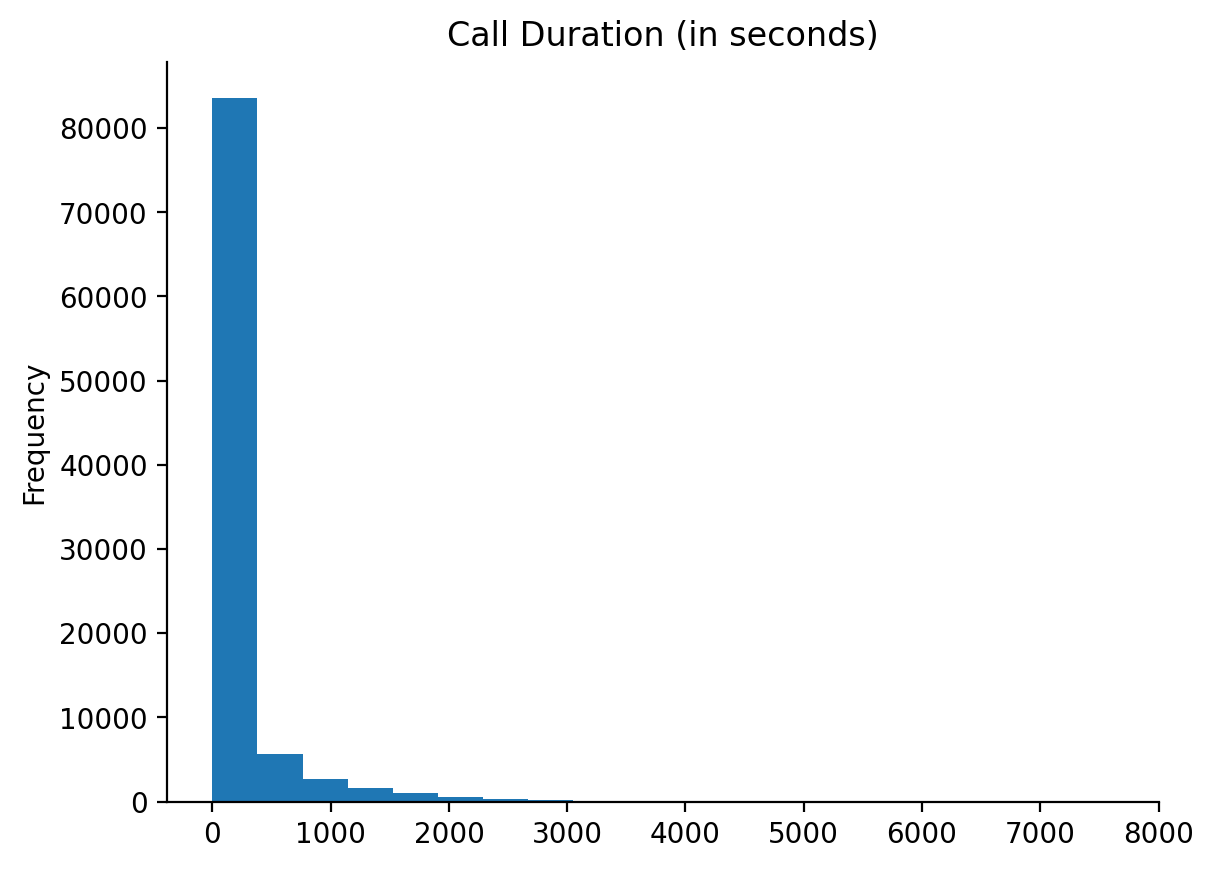

In [ ]:
# @title Call Duration (in seconds)

from matplotlib import pyplot as plt
calls['Call Duration (in seconds)'].plot(kind='hist', bins=20, title='Call Duration (in seconds)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#преобразовать в datetime для дальнейшего анализа временных рядов
calls["Call Start Time"] = pd.to_datetime(calls["Call Start Time"], errors="raise")

<ipython-input-3-4f9a9e0b66e1>:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  calls["Call Start Time"] = pd.to_datetime(calls["Call Start Time"], errors="raise")


In [ ]:
calls.info()
calls.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id                          95874 non-null  int64         
 1   Call Start Time             95874 non-null  datetime64[ns]
 2   Call Owner Name             95874 non-null  object        
 3   CONTACTID                   91941 non-null  object        
 4   Call Type                   95874 non-null  object        
 5   Call Duration (in seconds)  95791 non-null  float64       
 6   Call Status                 95874 non-null  object        
 7   Dialled Number              0 non-null      float64       
 8   Outgoing Call Status        86875 non-null  object        
 9   Scheduled in CRM            86875 non-null  float64       
 10  Tag                         0 non-null      float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)


,0
Id,0
Call Start Time,0
Call Owner Name,0
CONTACTID,3933
Call Type,0
Call Duration (in seconds),83
Call Status,0
Dialled Number,95874
Outgoing Call Status,8999
Scheduled in CRM,8999


In [ ]:
calls.columns

Index(['Id', 'Call Start Time', 'Call Owner Name', 'CONTACTID', 'Call Type',
       'Call Duration (in seconds)', 'Call Status', 'Dialled Number',
       'Outgoing Call Status', 'Scheduled in CRM', 'Tag'],
      dtype='object')

In [ ]:
# удаление ненужных столбцов, так как они не нисут никакой информации
calls = calls.drop(columns=["Tag", "Dialled Number"])

In [ ]:
# нахождение дубликатов(3257)
columns_calls = ['Call Start Time', 'Call Owner Name', 'CONTACTID', 'Call Type',
       'Call Duration (in seconds)', 'Call Status',
       'Outgoing Call Status', 'Scheduled in CRM']
calls[calls.duplicated(subset=columns_calls)]

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Outgoing Call Status,Scheduled in CRM
35,5805028000001167001,2023-07-06 17:15:00,Alice Johnson,5805028000001129001,Outbound,0.0,Unattended Dialled,Completed,0.0
102,5805028000001348077,2023-07-08 16:43:00,John Doe,NaN,Missed,0.0,Missed,NaN,NaN
255,5805028000001546030,2023-07-12 19:23:00,Jane Smith,5805028000001552025,Outbound,0.0,Unattended Dialled,Completed,0.0
278,5805028000001679013,2023-07-13 12:26:00,Jane Smith,NaN,Missed,0.0,Missed,NaN,NaN
348,5805028000001792001,2023-07-13 20:28:00,Alice Johnson,5805028000001363222,Outbound,0.0,Unattended Dialled,Completed,0.0
...,...,...,...,...,...,...,...,...,...
95522,5805028000056725508,2024-06-20 17:43:00,Kevin Parker,5805028000037097355,Missed,0.0,Missed,NaN,NaN
95692,5805028000056828261,2024-06-21 12:11:00,Ian Miller,5805028000056578096,Outbound,0.0,Unattended Dialled,Completed,0.0
95804,5805028000056832311,2024-06-21 14:17:00,Yara Edwards,NaN,Outbound,8.0,Attended Dialled,Completed,0.0
95834,5805028000056873560,2024-06-21 14:47:00,Ulysses Adams,5805028000026041053,Outbound,0.0,Unattended Dialled,Completed,0.0


In [ ]:
calls = calls.drop_duplicates(subset=columns_calls) # удаление дубликатов

Поле Call Type в таблице Calls принимает следующие значения:

* Inbound — Входящий звонок, то есть звонок, который поступил от клиента или другой стороны в компанию.
* Outbound — Исходящий звонок, сделанный сотрудником компании в адрес клиента или другой стороны.
* Missed — Пропущенный звонок, который не был принят ни одной из сторон.

In [ ]:
calls["Call Type"].unique()

array(['Inbound', 'Outbound', 'Missed'], dtype=object)

In [ ]:
calls[calls["Call Type"] == "Inbound"]

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Outgoing Call Status,Scheduled in CRM
0,5805028000000805001,2023-06-30 08:43:00,John Doe,NaN,Inbound,171.0,Received,NaN,NaN
15,5805028000001066016,2023-07-05 19:18:00,Alice Johnson,NaN,Inbound,13.0,Received,NaN,NaN
17,5805028000001076018,2023-07-05 20:14:00,John Doe,NaN,Inbound,33.0,Received,NaN,NaN
42,5805028000001149025,2023-07-06 18:03:00,Alice Johnson,5805028000001129001,Inbound,90.0,Received,NaN,NaN
48,5805028000001221002,2023-07-07 10:17:00,Jane Smith,5805028000001204049,Inbound,36.0,Received,NaN,NaN
...,...,...,...,...,...,...,...,...,...
95775,5805028000056889407,2024-06-21 13:48:00,Yara Edwards,NaN,Inbound,96.0,Received,NaN,NaN
95788,5805028000056833355,2024-06-21 14:05:00,Ulysses Adams,5805028000056362225,Inbound,312.0,Received,NaN,NaN
95806,5805028000056854394,2024-06-21 14:18:00,Yara Edwards,5805028000056703639,Inbound,332.0,Received,NaN,NaN
95848,5805028000056834459,2024-06-21 15:03:00,Derek James,5805028000022524164,Inbound,564.0,Received,NaN,NaN


In [ ]:
calls["Outgoing Call Status"].unique()

array([nan, 'Completed', 'Cancelled', 'Overdue', 'Scheduled'],
      dtype=object)

Поле Outgoing Call Status в таблице Calls принимает следующие значения:

* Completed — Исходящий звонок был успешно завершён.
* Cancelled — Исходящий звонок был отменён до его завершения.
* Overdue — Исходящий звонок был просрочен и не выполнен вовремя.
* Scheduled — Исходящий звонок запланирован на будущее.
* NaN (пустое значение) — Статус звонка не указан или не применим.

In [ ]:
calls["Outgoing Call Status"].value_counts()

,count
Outgoing Call Status,
Completed,83725
Overdue,57
Cancelled,19
Scheduled,3


#### **Анализ и предложения по типам данных:**
- **CONTACTID**: float64 - преобразовать в str, т.к. это идентификатор
- **Call Start Time**: object - преобразовать в datetime для дальнейшего анализа временных рядов
- **Call Owner Name**, **Call Type**, **Outgoing Call Status** , **Call Status**, **Scheduled in CRM**: object - преобразовать в категориальный тип данных,чтобы эффективнее хранить и обрабатывать значения
- **Call Duration (in seconds)**: float64 - преобразовать в int32, т.к. это целые числа



#### **Предложения по пропущенным значениям:**
- **Call Duration (in seconds)** пропущенные значения были заполнены медианным значением. В этом случае использование медианы позволит сохранить более точное представление о типичной длительности звонков, поэтому выбрана медиана вместо среднего.
- **Outgoing Call Status** пропущенные значения были заполнены значением "Unknown". Значение "Unknown" явно обозначает, что статус исходящего звонка не был указан. Это лучше, чем удалять строки или оставлять пропуски, так как сохраняется структура данных для последующего анализа.
- **Scheduled in CRM** пропущенные значения были заполнены значением "Unknown". Значения "Unknown" указывает на то, что мы не знаем, был ли звонок запланирован в CRM или не был.
- **CONTACTID** удаляеть строки с пропущенными значениями в столбце,так как это идентификатор, и будет использован для соединения с другими таблицами.
- **Tag, Dialled Number** - удалить столбцы, так как все значения 0 non-null

#### **Преобразование типов данных и обработка пропущенных значений:**

In [ ]:
# удаляет строки с пропущенными значениями в столбце 'CONTACTID'
calls = calls.dropna(subset=['CONTACTID'])

#пропущенные значения были заполнены медианным значением.
calls['Call Duration (in seconds)'] = calls['Call Duration (in seconds)'].fillna(calls['Call Duration (in seconds)'].median())
calls['Call Duration (in seconds)'] = calls['Call Duration (in seconds)'].astype('int32')
# Создадим переменную: список столбцов которые нужно преобразовать в категориальный тип данных
category_columns = ['Call Owner Name', 'Call Type', 'Call Status', 'Outgoing Call Status', 'Scheduled in CRM']

# Преобразуем нужные столбцы
for col in category_columns:
    calls[col] = calls[col].astype('category')

# Заполним пропущенные значения и добавим категории 'Unknown'
for col in ['Outgoing Call Status', 'Scheduled in CRM']:
    if 'Unknown' not in calls[col].cat.categories:
        calls[col] = calls[col].cat.add_categories(['Unknown'])
    calls[col] = calls[col].fillna('Unknown')

<ipython-input-33-188f13c4e31b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls['Call Duration (in seconds)'] = calls['Call Duration (in seconds)'].fillna(calls['Call Duration (in seconds)'].median())
<ipython-input-33-188f13c4e31b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls['Call Duration (in seconds)'] = calls['Call Duration (in seconds)'].astype('int32')
<ipython-input-33-188f13c4e31b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [ ]:
# Проверка данных после заполнения пропусков и преобразования
calls.info()
calls.isna().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 88815 entries, 3 to 95872
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id                          88815 non-null  int64         
 1   Call Start Time             88815 non-null  datetime64[ns]
 2   Call Owner Name             88815 non-null  category      
 3   CONTACTID                   88815 non-null  object        
 4   Call Type                   88815 non-null  category      
 5   Call Duration (in seconds)  88815 non-null  int32         
 6   Call Status                 88815 non-null  category      
 7   Outgoing Call Status        88815 non-null  category      
 8   Scheduled in CRM            88815 non-null  category      
dtypes: category(5), datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 3.5+ MB


,0
Id,0
Call Start Time,0
Call Owner Name,0
CONTACTID,0
Call Type,0
Call Duration (in seconds),0
Call Status,0
Outgoing Call Status,0
Scheduled in CRM,0


### 1.2. Анализ датасета Contacts

In [ ]:
contacts = pd.read_excel('Contacts.xlsx', dtype = {"Id": str})
contacts['Modified Time'] = pd.to_datetime(contacts['Modified Time'])
contacts['Created Time'] = pd.to_datetime(contacts['Created Time'])
display(contacts.head())


<ipython-input-96-24f59c3ee6a5>:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  contacts['Modified Time'] = pd.to_datetime(contacts['Modified Time'])
<ipython-input-96-24f59c3ee6a5>:3: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  contacts['Created Time'] = pd.to_datetime(contacts['Created Time'])


,Id,Contact Owner Name,Created Time,Modified Time
0,5805028000000645014,Rachel White,2023-06-27 11:28:00,2023-12-22 13:34:00
1,5805028000000872003,Charlie Davis,2023-07-03 11:31:00,2024-05-21 10:23:00
2,5805028000000889001,Bob Brown,2023-07-02 22:37:00,2023-12-21 13:17:00
3,5805028000000907006,Bob Brown,2023-07-03 05:44:00,2023-12-29 15:20:00
4,5805028000000939010,Nina Scott,2023-07-04 10:11:00,2024-04-16 16:14:00


In [ ]:
contacts.isna().sum()

,0
Id,0
Contact Owner Name,0
Created Time,0
Modified Time,0


#### **Анализ и предложения по типам данных:**
- **Created Time** , **Modified Time**: object - преобразовать в datetime для дальнейшего анализа временных рядов

- **Contact Owner Name**: object - преобразовать в категориальный тип данных.

In [ ]:
contacts['Contact Owner Name'] = contacts['Contact Owner Name'].astype('category')

In [ ]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  18548 non-null  object        
 1   Contact Owner Name  18548 non-null  category      
 2   Created Time        18548 non-null  datetime64[ns]
 3   Modified Time       18548 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2), object(1)
memory usage: 454.2+ KB


In [ ]:
#Удаление дубликатов
contacts[contacts.duplicated(subset=contacts.columns[1:])].shape

(38, 4)

In [ ]:
contacts.drop_duplicates(subset=contacts.columns[1:], inplace=True)

In [ ]:
contacts[contacts.duplicated(subset=contacts.columns[1:])].shape

(0, 4)

In [ ]:
# обнаружение некоректной записи в столбце Contact Owner Name -FALSE
contacts['Contact Owner Name'].value_counts()

,count
Contact Owner Name,
Charlie Davis,2018
Ulysses Adams,1809
Julia Nelson,1769
Paula Underwood,1486
Quincy Vincent,1415
Nina Scott,1148
Ben Hall,1037
Victor Barnes,966
Cara Iverson,880


In [ ]:
contacts[contacts['Contact Owner Name'] == 'FALSE']

,Id,Contact Owner Name,Created Time,Modified Time


In [ ]:
#Удаление FALSE!
contacts = contacts.loc[contacts['Contact Owner Name'] != 'FALSE']
#contacts = contacts.query("`Contact Owner Name` != 'FALSE'")

In [ ]:
contacts.isna().sum()

,0
Id,0
Contact Owner Name,0
Created Time,0
Modified Time,0


### 1.3. Анализ датасета Spend

In [ ]:
spend = pd.read_excel('Spend.xlsx')
spend['Date'] = pd.to_datetime(spend['Date'])
display(spend.head())


,Date,Source,Campaign,Impressions,Spend,Clicks,AdGroup,Ad
0,2023-07-03,Google Ads,gen_analyst_DE,6,0.00,0,NaN,NaN
1,2023-07-03,Google Ads,performancemax_eng_DE,4,0.01,1,NaN,NaN
2,2023-07-03,Facebook Ads,NaN,0,0.00,0,NaN,NaN
3,2023-07-03,Google Ads,NaN,0,0.00,0,NaN,NaN
4,2023-07-03,CRM,NaN,0,0.00,0,NaN,NaN


In [ ]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20779 entries, 0 to 20778
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         20779 non-null  datetime64[ns]
 1   Source       20779 non-null  object        
 2   Campaign     14785 non-null  object        
 3   Impressions  20779 non-null  int64         
 4   Spend        20779 non-null  float64       
 5   Clicks       20779 non-null  int64         
 6   AdGroup      13951 non-null  object        
 7   Ad           13951 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.3+ MB


In [ ]:
spend.isna().sum()

,0
Date,0
Source,0
Campaign,5994
Impressions,0
Spend,0
Clicks,0
AdGroup,6828
Ad,6828


In [ ]:
spend.duplicated().sum()

917

In [ ]:
spend = spend[~spend.isin(empty).any(axis=1)]

In [ ]:
spend.drop_duplicates(subset=spend.columns[1:], inplace=True)

In [ ]:
spend[spend.duplicated(subset=spend.columns[1:])].shape

(0, 8)

In [ ]:
#Source,Campaign: object -> category
spend[['Source', 'Campaign']] = spend[['Source', 'Campaign']].astype('category')


In [ ]:
# Удаление дубликатов
spend[(spend.Date == "2023-11-16") & (spend.Campaign == "04.07.23recentlymoved_DE")]

,Date,Source,Campaign,Impressions,Spend,Clicks,AdGroup,Ad
6754,2023-11-16,Facebook Ads,04.07.23recentlymoved_DE,18,0.16,0,recentlymoved,bloggersvideo3com
6763,2023-11-16,Facebook Ads,04.07.23recentlymoved_DE,940,11.35,23,recentlymoved,bloggersvideo4com
6764,2023-11-16,Facebook Ads,04.07.23recentlymoved_DE,20,0.28,0,recentlymoved,bloggersvideo2com


In [ ]:
spend.duplicated().sum()

0

In [ ]:
# Фильтруем, оставляя только те строки, где значение в столбце "Impressions" не равно нулю.
spend_dup = spend[spend.duplicated(subset=spend.columns[1:])]
spend_dup[spend_dup["Impressions"] !=0 ]

,Date,Source,Campaign,Impressions,Spend,Clicks,AdGroup,Ad


In [ ]:
spend

,Date,Source,Campaign,Impressions,Spend,Clicks,AdGroup,Ad
0,2023-07-03,Google Ads,gen_analyst_DE,6,0.00,0,NaN,NaN
1,2023-07-03,Google Ads,performancemax_eng_DE,4,0.01,1,NaN,NaN
4,2023-07-03,CRM,NaN,0,0.00,0,NaN,NaN
5,2023-07-03,Facebook Ads,03.07.23women,187,3.30,6,women,b3
6,2023-07-03,Facebook Ads,03.07.23women,4,0.02,1,women,b1
...,...,...,...,...,...,...,...,...
20771,2024-06-21,Tiktok Ads,22.05.2024wide_DE,7,0.03,0,wide,bloggersvideo18com
20772,2024-06-21,Youtube Ads,youtube_shorts_DE,90,0.51,2,Com_august,bloggersvideo3june
20774,2024-06-21,Facebook Ads,17.03.24wide_AT,7,0.07,0,wide,bloggersvideo16com_at
20775,2024-06-21,Tiktok Ads,12.07.2023wide_DE,61,0.16,0,wide,bloggersvideo14com


In [ ]:
#нахождение пустых значений
empty = spend[(spend['Campaign'].isnull()) &
                    (spend['Impressions'] == 0) &
                    (spend['Clicks'] == 0) &
                    (spend['Spend'] == 0) &
                    (spend['Source'].isin(['Tiktok Ads', 'Google Ads', 'Facebook Ads', 'Youtube Ads', 'Webinar', 'Test']))]

empty

,Date,Source,Campaign,Impressions,Spend,Clicks,AdGroup,Ad
18,2023-07-04,Google Ads,NaN,0,0.0,0,NaN,NaN
21,2023-07-04,Tiktok Ads,NaN,0,0.0,0,NaN,NaN
28,2023-07-04,Facebook Ads,NaN,0,0.0,0,NaN,NaN
35,2023-07-04,Youtube Ads,NaN,0,0.0,0,NaN,NaN
1202,2023-08-02,Webinar,NaN,0,0.0,0,NaN,NaN
7469,2023-12-02,Test,NaN,0,0.0,0,NaN,NaN


In [ ]:
spend = spend[~spend.isin(empty).any(axis=1)]

In [ ]:
spend.columns

Index(['Date', 'Source', 'Campaign', 'Impressions', 'Spend', 'Clicks',
       'AdGroup', 'Ad'],
      dtype='object')

 Процент пропусков в столбце = 0.0


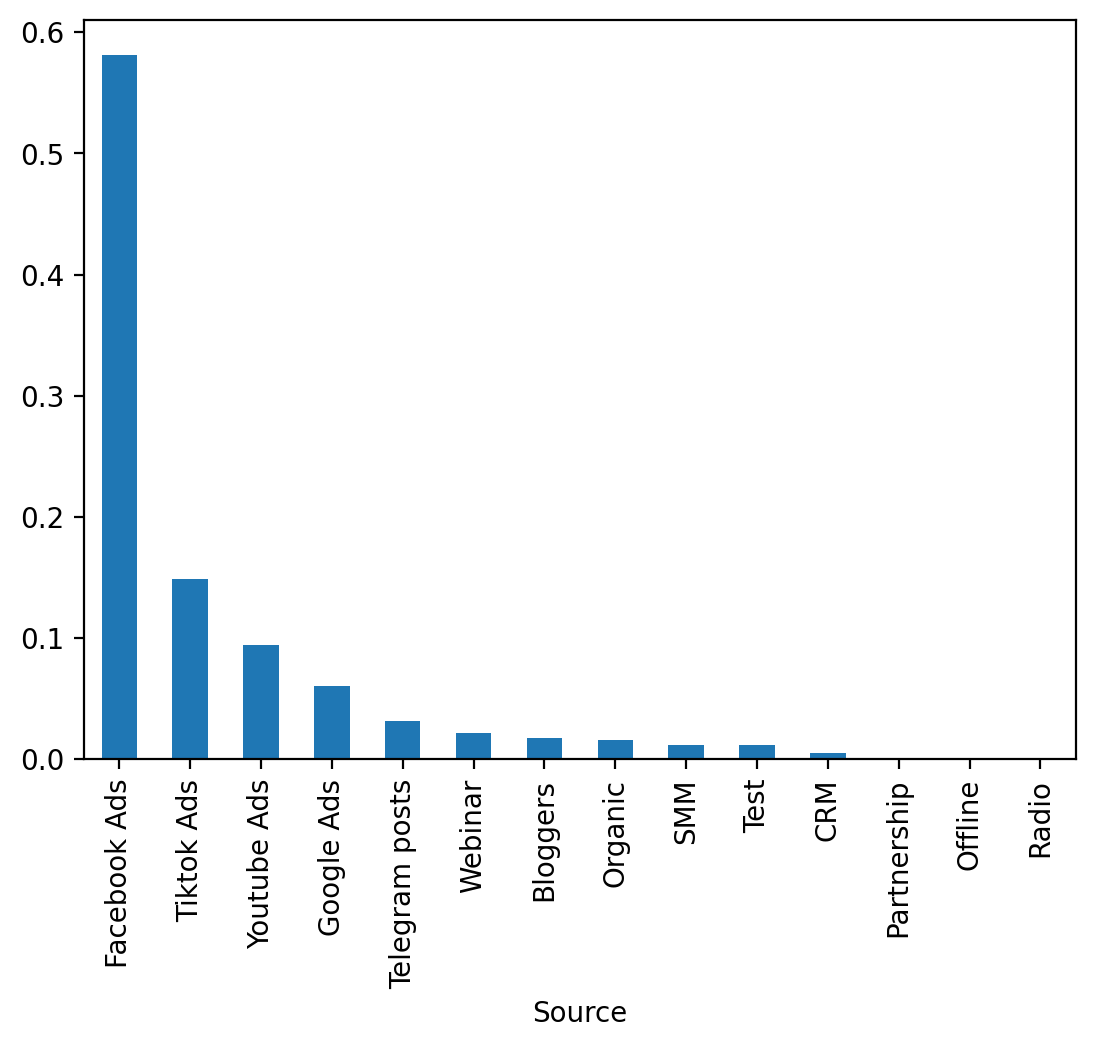

 Процент пропусков в столбце = 8.285163776493256


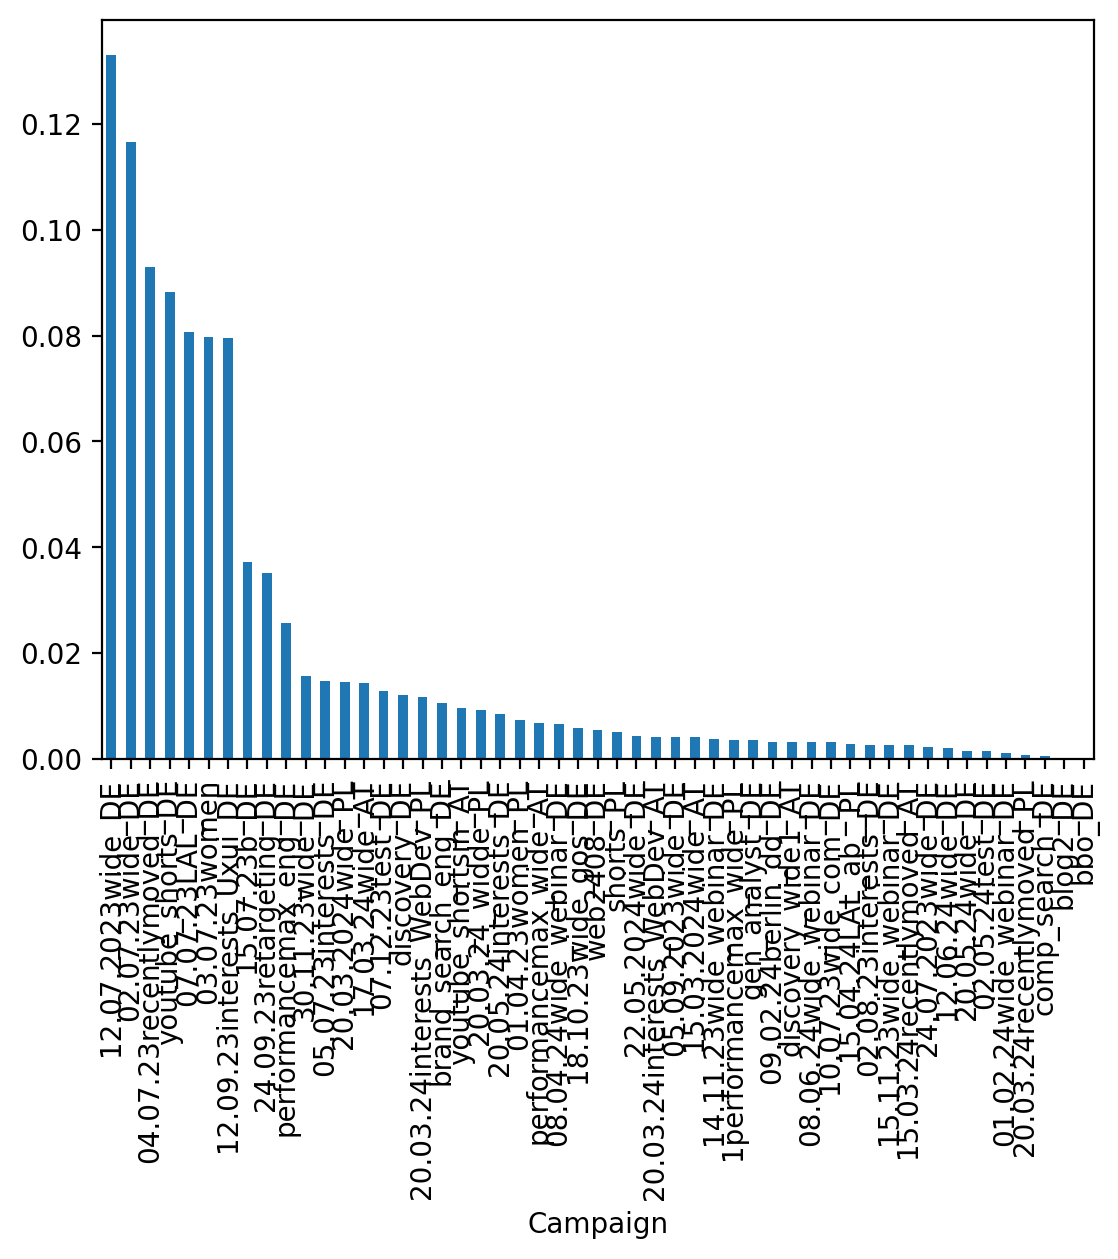

 Процент пропусков в столбце = 13.826323832303503


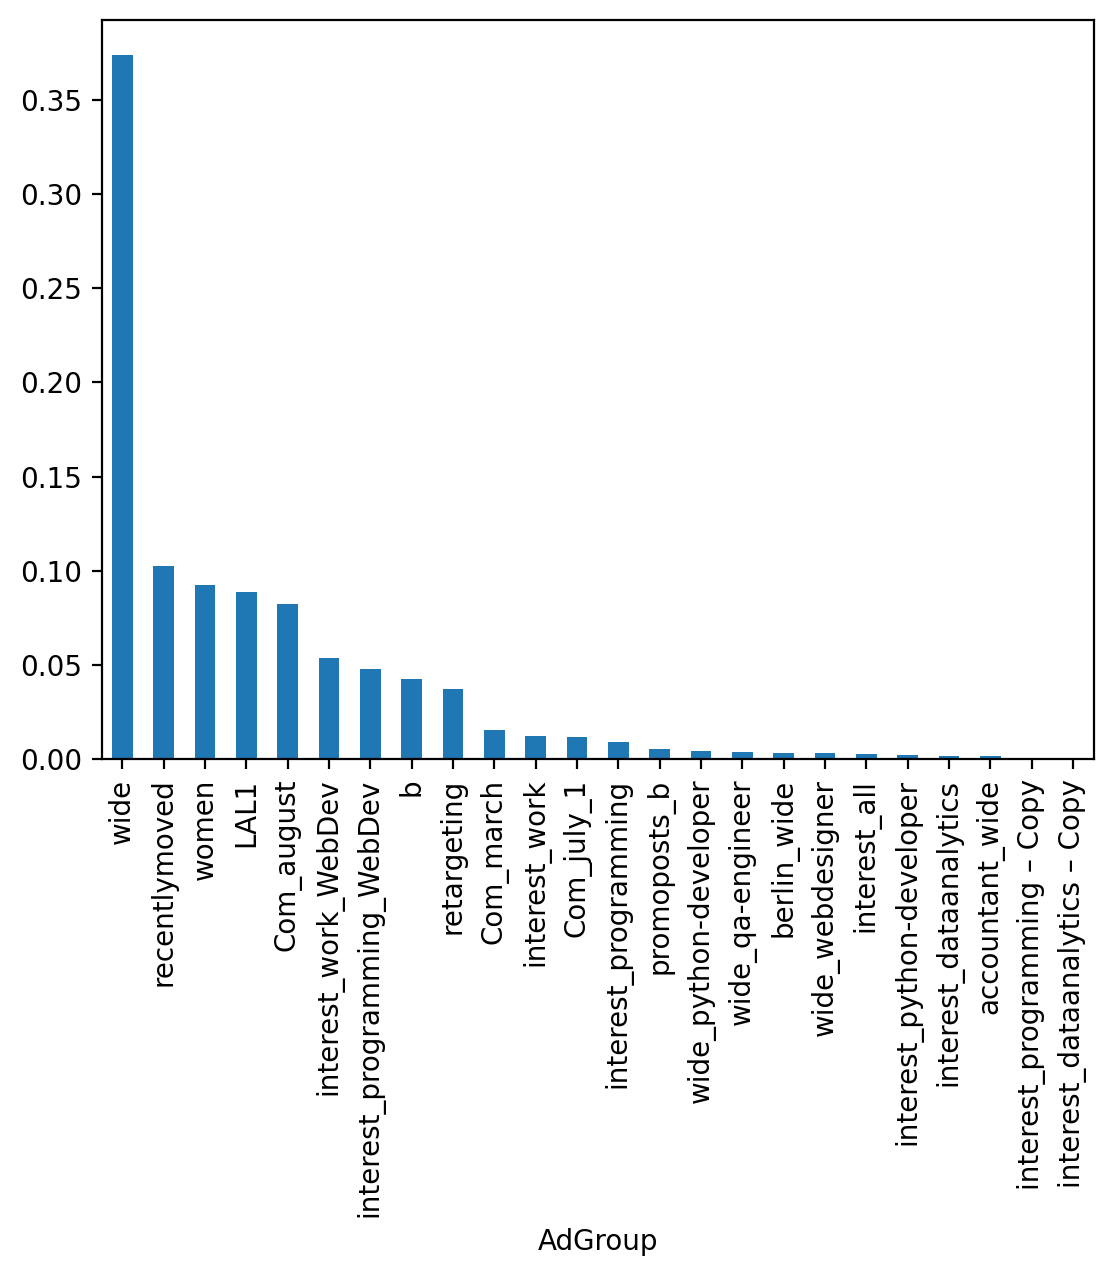

 Процент пропусков в столбце = 13.826323832303503


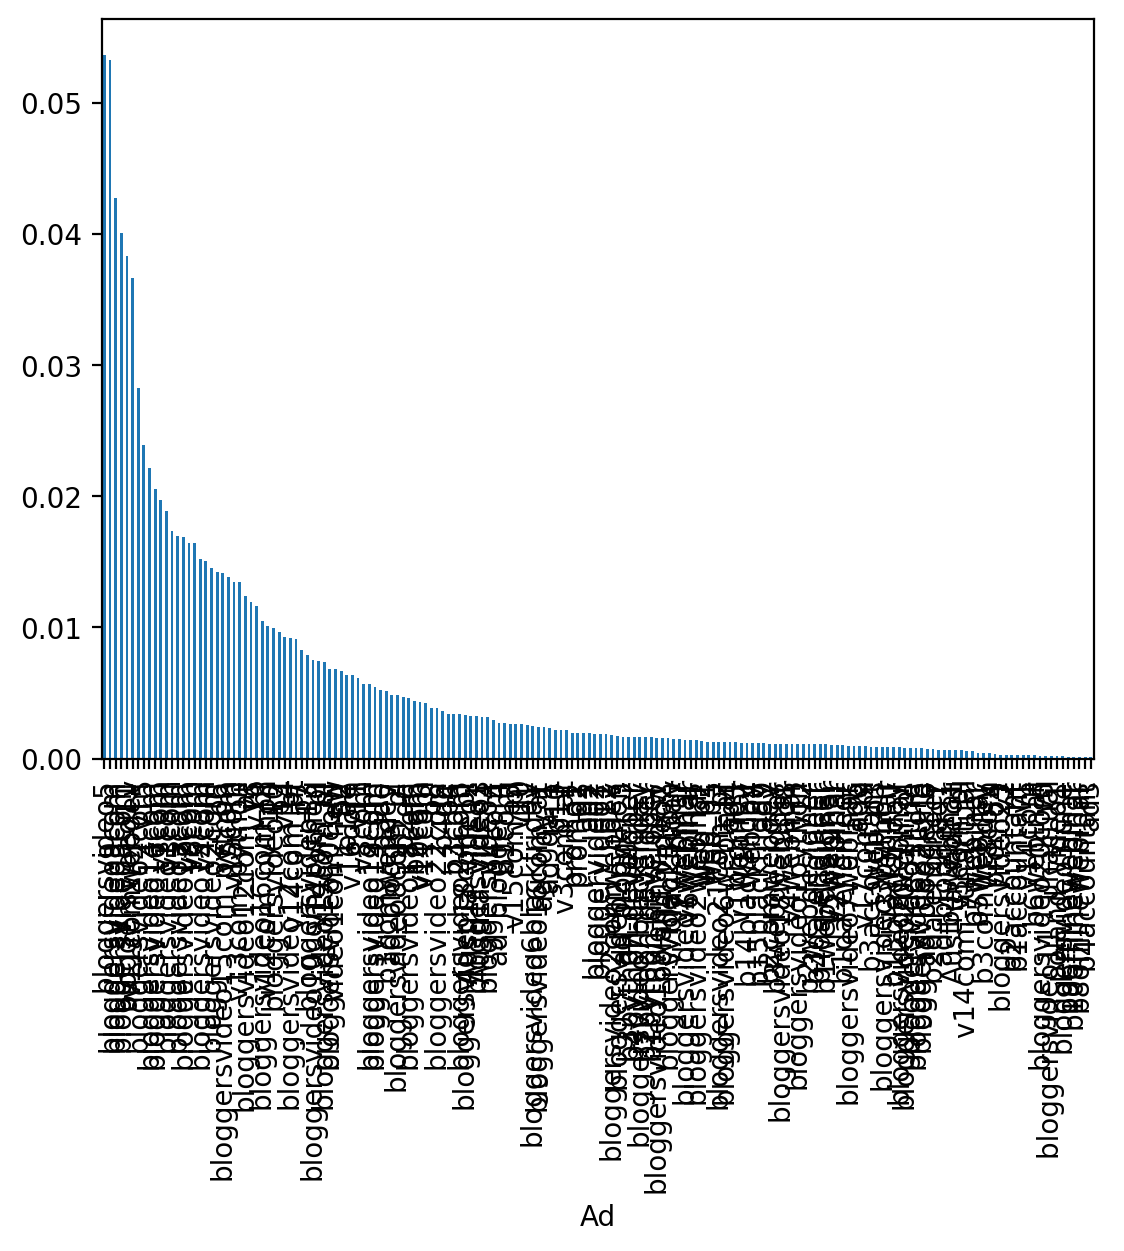

In [ ]:
#spend, impressions
for col in ['Source', 'Campaign','AdGroup', 'Ad']:
    print(f' Процент пропусков в столбце = {spend[col].isna().mean()*100}')
    spend[col].value_counts(normalize = True).plot(kind ='bar') #normalize = True- показывает % Процент пропусков в столбце
    plt.show()

- **Ad**, **AdGroup** - удалим столбцы, поскольку здесь процент пропусков в столбце слишком большой и они не является ключевым для анализа.

In [ ]:
spend = spend.drop(columns=['AdGroup', 'Ad'])

In [ ]:
spend.isna().sum()

,0
Date,0
Source,0
Campaign,1247
Impressions,0
Spend,0
Clicks,0


In [ ]:
spend['Spend'].value_counts()

,count
Spend,
0.00,1147
0.02,274
0.01,260
0.04,203
0.05,177
...,...
20.17,1
48.29,1
11.13,1


Возможные интерпретации каждого источника лида, которые представлены в поле **Source**:

1. **Facebook Ads** — Лид был получен через рекламу в социальной сети Facebook. Это могут быть контекстные объявления или спонсируемые посты, на которые кликнул пользователь.

2. **Organic** — Лид пришел через органический поиск, то есть пользователь нашёл сайт или страницу через поисковые системы (например, Google), без участия платной рекламы.

3. **Telegram posts** — Лид был получен через публикации в мессенджере Telegram, например, посты в канале или группах.

4. **Google Ads** — Лид пришел с рекламной платформы Google, через контекстную рекламу или объявления на сторонних сайтах, запущенные через Google Ads.

5. **Youtube Ads** — Лид был привлечён через рекламу на платформе YouTube, например, видеообъявления, показываемые перед или во время видео.

6. **CRM** — Этот источник указывает на то, что лид был получен через внутренние процессы CRM-системы, возможно через внутренние данные, повторные контакты или автоматические воронки.

7. **Webinar** — Лид был получен в результате участия в вебинаре. Это может быть регистрация или участие пользователя в образовательном или рекламном онлайн-мероприятии.

8. **SMM** — Лид пришёл через социальные медиа-маркетинг (SMM), что подразумевает продвижение через социальные сети, но без конкретного указания платформы.

9. **Tiktok Ads** — Лид был получен через рекламу на платформе TikTok, где использовались короткие видеоролики для привлечения аудитории.

10. **Bloggers** — Лид пришёл благодаря сотрудничеству с блогерами, которые могли упомянуть продукт или услугу в своих постах, видео или обзорах.

11. **Partnership** — Лид был получен через партнёрские программы или коллаборации с другими компаниями или организациями.

12. **Test** — Источник помечен как "Тест", что может указывать на то, что лид был получен в рамках тестовой кампании или эксперимента.

13. **Offline** — Лид пришёл через оффлайн-источники, такие как личные встречи, мероприятия, конференции или другие формы нецифрового взаимодействия.

14. **NaN** — Пустое значение, что означает отсутствие данных об источнике лида.

Эти источники помогают компании отслеживать, откуда приходят лиды, и оценивать эффективность различных каналов маркетинга и привлечения клиентов.

In [ ]:
spend.isna().sum()

,0
Date,0
Source,0
Campaign,1247
Impressions,0
Spend,0
Clicks,0


### 1.4. Анализ датасета Deals

In [ ]:
deals = pd.read_excel('Deals.xlsx', dtype = {"Id": str, "Contact Name": str})
deals.head()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
0,5805028000056864695,Ben Hall,NaN,NaN,New Lead,NaN,/eng/test,03.07.23women,NaN,v16,...,NaN,NaN,21.06.2024 15:30,NaN,NaN,NaN,NaN,5805028000056849495,NaN,NaN
1,5805028000056859489,Ulysses Adams,NaN,NaN,New Lead,NaN,/at-eng,NaN,NaN,NaN,...,Web Developer,Morning,21.06.2024 15:23,6.0,NaN,0,2000,5805028000056834471,NaN,NaN
2,5805028000056832357,Ulysses Adams,21.06.2024,D - Non Target,Lost,Non target,/at-eng,engwien_AT,00:26:43,b1-at,...,NaN,NaN,21.06.2024 14:45,NaN,NaN,NaN,NaN,5805028000056854421,NaN,NaN
3,5805028000056824246,Eva Kent,21.06.2024,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,01:00:04,bloggersvideo14com,...,NaN,NaN,21.06.2024 13:32,NaN,NaN,NaN,NaN,5805028000056889351,NaN,NaN
4,5805028000056873292,Ben Hall,21.06.2024,D - Non Target,Lost,Non target,/eng,discovery_DE,00:53:12,website,...,NaN,NaN,21.06.2024 13:21,NaN,NaN,NaN,NaN,5805028000056876176,NaN,NaN


In [ ]:
deals.info()
deals.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21595 entries, 0 to 21594
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   21593 non-null  object 
 1   Deal Owner Name      21564 non-null  object 
 2   Closing Date         14645 non-null  object 
 3   Quality              19340 non-null  object 
 4   Stage                21593 non-null  object 
 5   Lost Reason          16124 non-null  object 
 6   Page                 21593 non-null  object 
 7   Campaign             16067 non-null  object 
 8   SLA                  15533 non-null  object 
 9   Content              14147 non-null  object 
 10  Term                 12454 non-null  object 
 11  Source               21593 non-null  object 
 12  Payment Type         496 non-null    object 
 13  Product              3592 non-null   object 
 14  Education Type       3300 non-null   object 
 15  Created Time         21593 non-null 

,0
Id,2
Deal Owner Name,31
Closing Date,6950
Quality,2255
Stage,2
Lost Reason,5471
Page,2
Campaign,5528
SLA,6062
Content,7448


In [ ]:
deals.columns

Index(['Id', 'Deal Owner Name', 'Closing Date', 'Quality', 'Stage',
       'Lost Reason', 'Page', 'Campaign', 'SLA', 'Content', 'Term', 'Source',
       'Payment Type', 'Product', 'Education Type', 'Created Time',
       'Course duration', 'Months of study', 'Initial Amount Paid',
       'Offer Total Amount', 'Contact Name', 'City', 'Level of Deutsch'],
      dtype='object')

In [ ]:
#преобразовать в datetime для дальнейшего анализа временных рядов
deals['Closing Date'] = pd.to_datetime(deals['Closing Date'], errors='coerce')
deals['Created Time'] = pd.to_datetime(deals['Created Time'], errors='coerce')


<ipython-input-193-ac86eb0aee38>:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  deals['Closing Date'] = pd.to_datetime(deals['Closing Date'], errors='coerce')
<ipython-input-193-ac86eb0aee38>:3: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  deals['Created Time'] = pd.to_datetime(deals['Created Time'], errors='coerce')


 Для обработки пропусков в столце Created Time необходимо удалить некорректные строки как NaT и #REF!

In [ ]:
#Удаление #REF!
remove ='#REF!'
deals =deals[deals['Education Type']!= remove]
#contacts = contacts.query("`Contact Owner Name` != 'FALSE'")

In [ ]:
#Удаление NaT
remove ='NaT'
deals =deals[deals['Created Time']!= remove]
#contacts = contacts.loc[contacts['Contact Owner Name'] != 'FALSE']

In [ ]:
deals = deals.dropna(subset=['Created Time'])

In [ ]:
deals[deals['Created Time'].isna()]

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch


###Удаление дубликатов

In [ ]:
deals[deals.duplicated(subset=deals.columns[1:])].shape

(9, 23)

In [ ]:
deals.drop_duplicates(subset=deals.columns[1:], inplace=True)

In [ ]:
deals[deals.duplicated(subset=deals.columns[1:])].shape

(0, 23)

In [ ]:
# Удаление строк с пропущенными значениями в столбце 'Deal Owner Name'
deals = deals.dropna(subset=['Deal Owner Name'])

In [ ]:
# Удаление строк с пропусками в идентификаторах
deals = deals.dropna(subset=['Id', 'Contact Name'])

In [ ]:
# Заполнение отсутствующих значений в столбцах с категориальными данными значением 'Unknown'
deals['Quality'] = deals['Quality'].fillna('Unknown').astype('category')
deals['Stage'] = deals['Stage'].fillna('Unknown').astype('category')
deals['Lost Reason'] = deals['Lost Reason'].fillna('Unknown').astype('category')
deals['Page'] = deals['Page'].fillna('Unknown').astype('category')
deals['Campaign'] = deals['Campaign'].fillna('Unknown').astype('category')
deals['Content'] = deals['Content'].fillna('Unknown').astype('category')
deals['Term'] = deals['Term'].fillna('Unknown').astype('category')
deals['Source'] = deals['Source'].fillna('Unknown').astype('category')
deals['Payment Type'] = deals['Payment Type'].fillna('Unknown').astype('category')
deals['Product'] = deals['Product'].fillna('Unknown').astype('category')
deals['Education Type'] = deals['Education Type'].fillna('Unknown').astype('category')



# Обработка столбцов Offer Total Amount и Initial Amount Paid

In [ ]:
deals[deals['Offer Total Amount'].notna()]

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
1,5805028000056859489,Ulysses Adams,NaT,Unknown,New Lead,Unknown,/at-eng,Unknown,NaN,Unknown,...,Web Developer,Morning,2024-06-21 15:23:00,6.0,NaN,0,2000,5805028000056834471,NaN,NaN
56,5805028000056683030,Charlie Davis,NaT,C - Low,Waiting For Payment,Unknown,/eng/test,performancemax_eng_DE,00:20:39,_{region_name}_,...,Web Developer,Morning,2024-06-20 12:34:00,6.0,NaN,1000,9000,5805028000056690015,Crailsheim,NaN
60,5805028000056558351,Ulysses Adams,NaT,C - Low,Waiting For Payment,Unknown,/eng,Unknown,00:09:49,Unknown,...,Web Developer,Morning,2024-06-20 11:16:00,6.0,NaN,1000,9000,5805028000056578244,Dortmund,в1
65,5805028000056555140,Paula Underwood,NaT,B - Medium,Waiting For Payment,Unknown,/eng,03.07.23women,01:55:11,v16,...,Digital Marketing,Morning,2024-06-20 08:48:00,11.0,NaN,1000,11000,5805028000056576103,Stuttgart,NaN
71,5805028000056564131,Ben Hall,NaT,D - Non Target,Waiting For Payment,Unknown,/eng,20.05.24interests_DE,12:51:39,bloggersvideo14com,...,UX/UI Design,Morning,2024-06-19 22:31:00,11.0,NaN,1000,11000,5805028000056575100,München,A2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,5805028000001020028,Jane Smith,2023-11-03,C - Low,Lost,Changed Decision,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,"1 day, 8:46:54",_{region_name}_,...,Digital Marketing,Unknown,2023-07-06 04:14:00,11.0,NaN,1000,11500,5805028000001079018,NaN,NaN
21578,5805028000001040014,Quincy Vincent,2023-07-14,C - Low,Lost,Conditions are not suitable,eng/digital-marketing,02.07.23wide_DE,"8 days, 18:22:16",b3,...,Digital Marketing,Morning,2023-07-05 18:06:00,11.0,NaN,1000,11000,5805028000001073001,Brake,NaN
21585,5805028000000935081,Julia Nelson,NaT,D - Non Target,Call Delayed,Unknown,eng/digital-marketing,03.07.23women,"70 days, 23:12:53",b3,...,Digital Marketing,Morning,2023-07-04 11:46:00,11.0,NaN,1000,11500,5805028000000971007,NaN,NaN
21586,5805028000000947046,Oliver Taylor,NaT,B - Medium,Payment Done,Unknown,eng/digital-marketing,02.07.23wide_DE,"71 days, 0:46:22",b3,...,Digital Marketing,Morning,2023-07-04 10:11:00,11.0,11.0,1000,11000,5805028000000939010,NaN,NaN


In [ ]:
# Вывод уникальных значений в столбце перед преобразованием, потому что там содержатся нечисловые данные, такие как '€' и запятые)
print(deals['Initial Amount Paid'].unique())
print(deals['Offer Total Amount'].unique())

[nan 0 1000 '€ 3.500,00' 500 100 4500 300 200 2000 11000 4000 3000 3500
 11500 1200 1500 1 5000 600 700 350 9 400 450]
[nan 2000 9000 11000 3500 4500 '€ 2.900,00' 6500 4000 3000 10000 2500 5000
 11500 1 1000 1200 0 1500 '€ 11398,00' 11111 6000]


In [ ]:
# Отключаем научную нотацию для корректного отображение сумм
np.set_printoptions(suppress=True)

In [ ]:
def clean_amount(value):
    if pd.isna(value):
        return np.nan  # Сохраняем NaN как есть
    if isinstance(value, str):
        # Удаляем символ валюты, разделители тысяч (точки) и заменяем запятую на точку
        value = value.replace('€', '').replace('.', '').replace(',', '.').strip()
    return value

# Применяем функцию ко всем значениям в столбце initial_amount_paid
deals['Initial Amount Paid'] = deals['Initial Amount Paid'].apply(clean_amount)

# Преобразуем значения в числовой формат
deals['Initial Amount Paid'] = pd.to_numeric(deals['Initial Amount Paid'], errors='coerce')

print(deals['Initial Amount Paid'].unique())
# print(deals.['Initial Amount Paid'].sum())
print(deals['Initial Amount Paid'].dtype)

[   nan     0.  1000.  3500.   500.   100.  4500.   300.   200.  2000.
 11000.  4000.  3000. 11500.  1200.  1500.     1.  5000.   600.   700.
   350.     9.   400.   450.]
float64


In [ ]:
# Применяем функцию ко всем значениям в столбце offer_total_amount
deals['Offer Total Amount']= deals['Offer Total Amount'].apply(clean_amount)

# Преобразуем значения в числовой формат
deals['Offer Total Amount'] = pd.to_numeric(deals['Offer Total Amount'], errors='coerce')

print(deals['Offer Total Amount'].unique())
# print(deals.['Offer Total Amount'].sum())
print(deals['Offer Total Amount'].dtype)

[   nan  2000.  9000. 11000.  3500.  4500.  2900.  6500.  4000.  3000.
 10000.  2500.  5000. 11500.     1.  1000.  1200.     0.  1500. 11398.
 11111.  6000.]
float64


In [ ]:
spend['Spend']= spend['Spend'].apply(clean_amount)

In [ ]:
deals['Offer Total Amount'].value_counts()

,count
Offer Total Amount,
0,17350
11000.0,1849
0.0,828
11500.0,392
5000.0,292
4000.0,251
3500.0,133
9000.0,115
2500.0,68


In [ ]:
deals['Initial Amount Paid'].value_counts()

,count
Initial Amount Paid,
0,17370
1000.0,2607
0.0,856
300.0,187
500.0,94
350.0,82
2000.0,58
11000.0,38
3500.0,37


In [ ]:
# Заполнение отсутствующих значений в столбцах с суммами значением '0'
deals['Initial Amount Paid'] = deals['Initial Amount Paid'].fillna('0')
deals['Offer Total Amount'] = deals['Offer Total Amount'].fillna('0')

In [ ]:
# Заполнение отсутствующие значения в столбцах с суммами медианным значением
deals['Course duration'] = deals['Course duration'].fillna(deals['Course duration'].median())
deals['Months of study'] = deals['Months of study'].fillna(deals['Months of study'].median())

In [ ]:
deals[['Course duration', 'Months of study']] = deals[['Course duration', 'Months of study']].astype('Int32')

In [ ]:
#заменаем на mode- часто встречающееся значение для City и Level of Deutsch для каждого уникального имени контакта
mode_values = deals.groupby('Contact Name')['City'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
deals['City'] = deals['Contact Name'].map(mode_values)

mode_values = deals.groupby('Contact Name')['Level of Deutsch'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
deals['Level of Deutsch'] = deals['Contact Name'].map(mode_values)

deals['City'] = deals['City'].fillna('Unknown').astype('category')


##Анализ столбца Contact Name

In [ ]:
deals['Contact Name'].value_counts()

,count
Contact Name,
5805028000003014152,54
5805028000005448163,38
5805028000017522090,19
5805028000014478367,13
5805028000000872003,11
...,...
5805028000039653253,1
5805028000039638318,1
5805028000039633305,1


In [ ]:
 #по ходу сделки один студент может записаться на 4 разных курса
deals.groupby('Contact Name')['Product'].nunique().sort_values(ascending= False)

,Product
Contact Name,
5805028000000872003,4
5805028000014092677,3
5805028000019929842,3
5805028000005448163,3
5805028000043599528,3
...,...
5805028000021257243,1
5805028000021257348,1
5805028000021257427,1


In [ ]:
deals[deals['Contact Name'] == '5805028000000872003']

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
16372,5805028000017300107,John Doe,NaT,Unknown,Registered on Webinar,Unknown,/,Unknown,NaN,Unknown,...,Unknown,Unknown,2023-11-16 17:41:00,11,5,NaN,NaN,5805028000000872003,Unknown,None
20370,5805028000005155037,John Doe,NaT,Unknown,Registered on Webinar,Unknown,/workshop,Unknown,NaN,Unknown,...,Digital Marketing,Evening,2023-08-18 20:48:00,11,5,NaN,NaN,5805028000000872003,Unknown,None
20371,5805028000005178088,John Doe,NaT,Unknown,Registered on Webinar,Unknown,/workshop,Unknown,NaN,Unknown,...,Unknown,Unknown,2023-08-18 20:46:00,11,5,NaN,NaN,5805028000000872003,Unknown,None
20373,5805028000005176076,John Doe,NaT,Unknown,Registered on Webinar,Unknown,/workshop,Unknown,NaN,Unknown,...,Digital Marketing,Evening,2023-08-18 20:22:00,11,5,NaN,NaN,5805028000000872003,Unknown,None
20374,5805028000005180061,John Doe,NaT,E - Non Qualified,Registered on Webinar,Unknown,/workshop,Unknown,"3 days, 18:22:35",Unknown,...,UX/UI Design,Morning,2023-08-18 19:58:00,11,5,100.0,4000.0,5805028000000872003,Unknown,None
20375,5805028000005174051,John Doe,NaT,Unknown,Registered on Webinar,Unknown,/workshop,Unknown,NaN,Unknown,...,Unknown,Unknown,2023-08-18 19:54:00,11,5,NaN,NaN,5805028000000872003,Unknown,None
20376,5805028000005168037,John Doe,NaT,Unknown,Registered on Webinar,Unknown,/workshop,web2408_DE,NaN,Unknown,...,Unknown,Unknown,2023-08-18 19:45:00,11,5,NaN,NaN,5805028000000872003,Unknown,None
20377,5805028000005176025,John Doe,NaT,Unknown,Registered on Webinar,Unknown,/workshop,web2408_DE,NaN,Unknown,...,Unknown,Unknown,2023-08-18 19:42:00,11,5,NaN,NaN,5805028000000872003,Unknown,None
20717,5805028000004111157,John Doe,NaT,C - Low,Lost,Duplicate,/,Unknown,"13 days, 23:40:53",Unknown,...,Web Developer,Morning,2023-08-08 14:40:00,6,5,3500.0,3500.0,5805028000000872003,Unknown,None
20884,5805028000003573412,Bob Brown,2023-08-07,E - Non Qualified,Lost,Duplicate,/test,Unknown,NaN,Unknown,...,Unknown,Unknown,2023-08-02 15:35:00,11,5,0.0,0.0,5805028000000872003,Unknown,None


#### **Анализ и предложения по типам данных:**
- **Id** , **Contact Name**: float64 - преобразовать в str, так как это идентификатор.
- **Deal Owner Name** , **Quality**, **Stage** , **Lost Reason**, **Page**,**Campaign** , **Content** , **Term**,**Source** , **Payment Type**, **Product** , **Education Type** , **City** , **Level of Deutsch**: object - преобразовать в категориальный тип данных.
- **Closing Date** , **Created Time**: object - преобразовать в datetime для дальнейшего анализа временных рядов.
- **SLA**: object - преобразуем значения в этом столбце в секунды (преобразуем с помощью функции).
- **Course duration** , **Months of study**: float64 - преобразовать в Int8.
- **Initial Amount Paid** , **Offer Total Amount**: object - оставляем float и nan, убрать симовлы валюты, запятые, точки.


** Преобразование столбцов в категориальный тип данных уменьшит объем памяти и ускорит дальнейшии операци.

### Изучение категориальных признаков

In [ ]:
deals.columns

Index(['Id', 'Deal Owner Name', 'Closing Date', 'Quality', 'Stage',
       'Lost Reason', 'Page', 'Campaign', 'SLA', 'Content', 'Term', 'Source',
       'Payment Type', 'Product', 'Education Type', 'Created Time',
       'Course duration', 'Months of study', 'Initial Amount Paid',
       'Offer Total Amount', 'Contact Name', 'City', 'Level of Deutsch'],
      dtype='object')

In [ ]:
deals['Closing Date'].unique() # присутствуют значения NaT- оставляем как есть без изменнений(статус текуших сделок не закрыт) ,так ка это большая часть данных 6944


<DatetimeArray>
[                'NaT', '2024-06-21 00:00:00', '2024-06-20 00:00:00',
 '2024-06-19 00:00:00', '2024-06-18 00:00:00', '2024-06-17 00:00:00',
 '2024-06-16 00:00:00', '2024-06-11 00:00:00', '2024-06-15 00:00:00',
 '2024-06-14 00:00:00',
 ...
 '2023-07-13 00:00:00', '2023-07-12 00:00:00', '2023-07-11 00:00:00',
 '2023-07-10 00:00:00', '2023-07-09 00:00:00', '2023-07-08 00:00:00',
 '2023-07-06 00:00:00', '2023-07-05 00:00:00', '2023-07-04 00:00:00',
 '2023-07-03 00:00:00']
Length: 359, dtype: datetime64[ns]

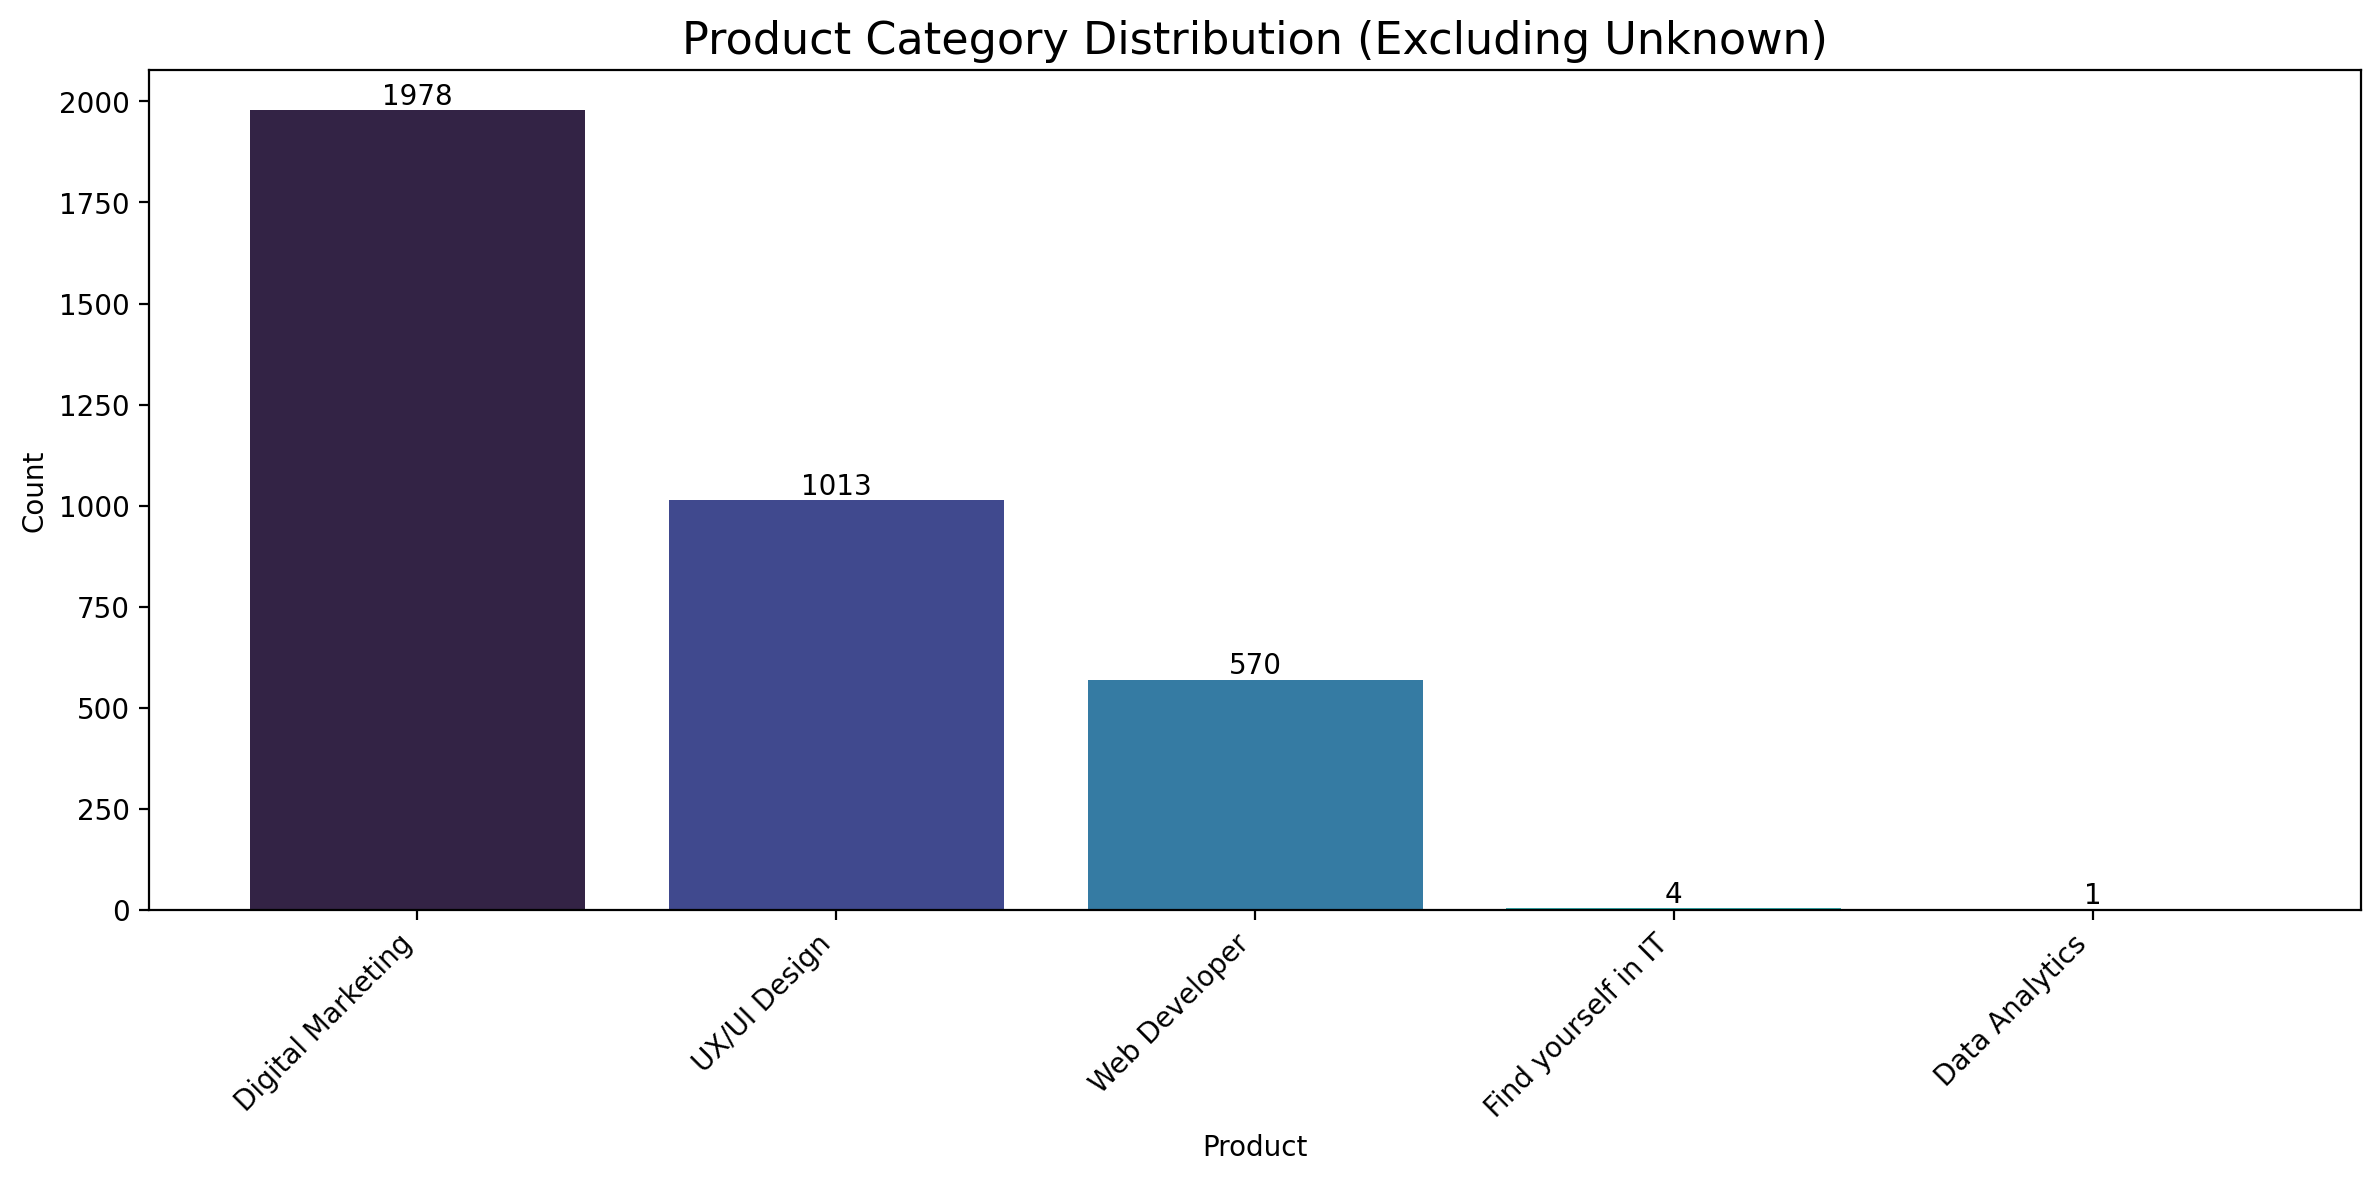

Процент исключенных 'Unknown' данных: 83.41%


In [ ]:
# Подсчет значений для каждой категории продукта, исключая "Unknown"
value_counts = deals.Product.value_counts()
value_counts = value_counts[value_counts.index != "Unknown"]
# Получение цветовой палитры
color_palette = sns.color_palette('mako', len(value_counts))

# Создание фигуры и оси
fig, ax = plt.subplots(figsize=(12, 6))

# Генерация столбчатой диаграммы
bars = ax.bar(value_counts.index, value_counts.values, color = color_palette)

# Добавление значений над каждым столбцом
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='bottom')

# Настройка осей и меток
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product')
plt.ylabel('Count')

# Настройка заголовка
plt.title('Product Category Distribution (Excluding Unknown)', fontsize=16)

# Настройка макета
plt.tight_layout()
plt.show()

# Опционально: вывод процента исключенных "Unknown" данных
total_count = deals.Product.count()
unknown_count = deals.Product.value_counts().get("Unknown", 0)
unknown_percentage = (unknown_count / total_count) * 100

print(f"Процент исключенных 'Unknown' данных: {unknown_percentage:.2f}%")

In [ ]:
# Closing Date NaT-6900
deals[deals['Closing Date'].isna()]

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
0,5805028000056864695,Ben Hall,NaT,Unknown,New Lead,Unknown,/eng/test,03.07.23women,NaN,v16,...,Unknown,Unknown,2024-06-21 15:30:00,11,5,NaN,NaN,5805028000056849495,Unknown,None
1,5805028000056859489,Ulysses Adams,NaT,Unknown,New Lead,Unknown,/at-eng,Unknown,NaN,Unknown,...,Web Developer,Morning,2024-06-21 15:23:00,6,5,0.0,2000.0,5805028000056834471,Unknown,None
5,5805028000056828429,Paula Underwood,NaT,Unknown,Need a consultation,Unknown,/eng,youtube_shorts_DE,01:33:10,bloggersvideo2june,...,Unknown,Unknown,2024-06-21 13:02:00,11,5,NaN,NaN,5805028000056833279,Unknown,None
6,5805028000056893379,Ulysses Adams,NaT,Unknown,Need To Call,Unknown,eng/digital-marketing,Unknown,NaN,Unknown,...,Unknown,Unknown,2024-06-21 12:52:00,11,5,NaN,NaN,5805028000056832215,Unknown,None
7,5805028000056849262,Eva Kent,NaT,Unknown,Need a consultation,Unknown,/eng,brand_search_eng_DE,02:12:29,152789402780_{region_name}_695563281558,...,Unknown,Unknown,2024-06-21 12:44:00,11,5,NaN,NaN,5805028000056833242,Unknown,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21564,5805028000001204084,Oliver Taylor,NaT,B - Medium,Lost,Stopped Answering,eng/digital-marketing,05.07.23interests_DE,03:09:15,b2,...,Digital Marketing,Unknown,2023-07-07 09:05:00,11,5,1000.0,11500.0,5805028000001187016,Unknown,None
21567,5805028000001225001,Oliver Taylor,NaT,B - Medium,Lost,Stopped Answering,eng/digital-marketing,02.07.23wide_DE,03:57:36,b3,...,Digital Marketing,Unknown,2023-07-07 06:53:00,11,5,1000.0,11500.0,5805028000001204013,Unknown,None
21580,5805028000001061006,George King,NaT,A - High,Call Delayed,Next stream,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,18:51:07,_{region_name}_,...,Unknown,Unknown,2023-07-05 17:30:00,11,5,NaN,NaN,5805028000001068001,Unknown,None
21585,5805028000000935081,Julia Nelson,NaT,D - Non Target,Call Delayed,Unknown,eng/digital-marketing,03.07.23women,"70 days, 23:12:53",b3,...,Digital Marketing,Morning,2023-07-04 11:46:00,11,5,1000.0,11500.0,5805028000000971007,Unknown,None


In [ ]:
#159 rows Source Test
deals[deals["Source"].isin(["Test"])][["Page", "Source"]]

,Page,Source
2100,/account,Test
2692,/account,Test
2707,/account,Test
2715,/account,Test
2716,/account,Test
...,...,...
14590,/ppc,Test
14598,/ppc,Test
14739,/web-developer,Test
14748,/web-developer,Test


Возможные значения URL-адресов:

1. **/test** — Обычно используется для тестовых страниц, которые создаются разработчиками или маркетологами для проверки функций, A/B тестирования или пробных запусков страницы.
   
2. **/ppc** — Это может означать страницу, связанную с **Pay-Per-Click** (PPC) рекламой. Это может быть целевая страница для клиентов, пришедших по контекстной рекламе.
   
3. **/page1** — Вероятно, это страница с порядковым номером, которая может использоваться для различных целей, например, для многостраничных форм или опросов.

4. **/** — Это может быть корневая (основная) страница сайта, то есть домашняя страница, которая загружается по основному домену.

5. **/account** — Страница, предназначенная для личного кабинета пользователя, где он может управлять своими данными, сделками, заказами и т.д.

6. **/eng/test** — Аналогично как и **/test**, это может быть тестовая страница, но для англоязычного сегмента сайта, что указывает на возможность её использования для проверки английской версии.

In [ ]:
deals["Source"].unique()

['Facebook Ads', 'Organic', 'Telegram posts', 'Google Ads', 'Youtube Ads', ..., 'Tiktok Ads', 'Bloggers', 'Partnership', 'Test', 'Offline']
Length: 13
Categories (13, object): ['Bloggers', 'CRM', 'Facebook Ads', 'Google Ads', ..., 'Test', 'Tiktok Ads',
                          'Webinar', 'Youtube Ads']

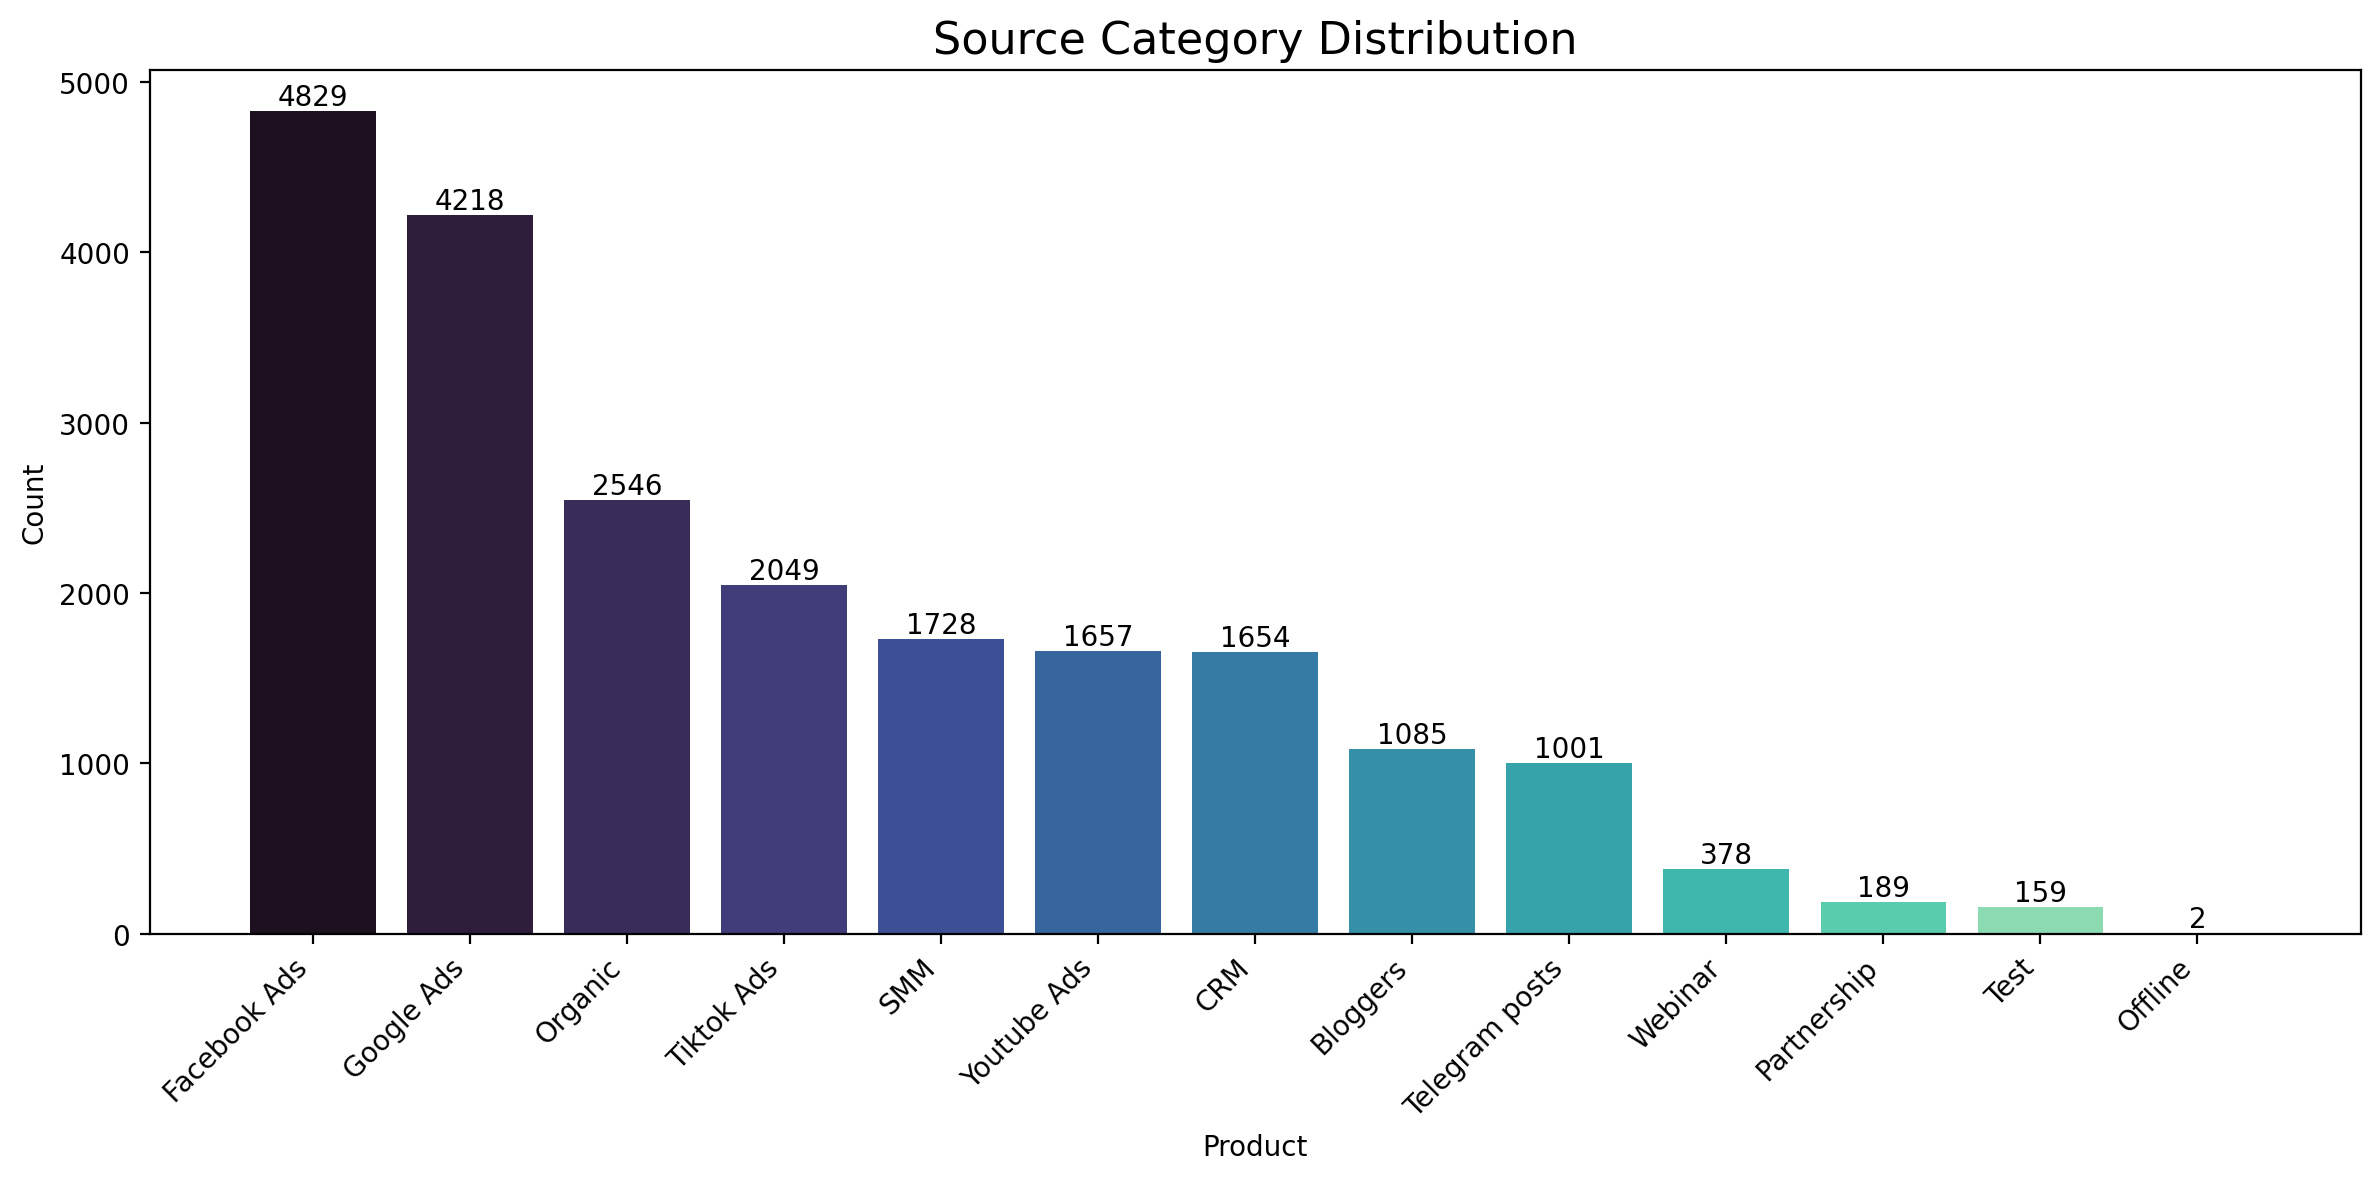

In [ ]:
value_counts = deals.Source.value_counts()
# Создание фигуры и оси
fig, ax = plt.subplots(figsize=(12, 6))
color_palette = sns.color_palette('mako', len(value_counts))
# Генерация столбчатой диаграммы
bars = ax.bar(value_counts.index, value_counts.values, color=color_palette)

# Добавление значений над каждым столбцом
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='bottom')

# Настройка осей и меток
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Source Category Distribution', fontsize=16)
plt.tight_layout()
plt.show()

# В столбце SLA время приведем к единому виду - секунды

In [ ]:
# Копируем значения из столбца 'SLA' в новый столбец 'SLA_Seconds'
deals['SLA_Seconds'] = deals['SLA']

In [ ]:
# Функция для преобразования строкового времени в секунды
def convert_time_to_seconds(value):
    if isinstance(value, int):
        return value  # Если уже в секундах, возвращаем как есть
    elif isinstance(value, float) or pd.isna(value):
        return 0  # Если значение float или отсутствует
    elif isinstance(value, time):
        return value.hour * 3600 + value.minute * 60 + value.second  # Время в секундах
    elif isinstance(value, timedelta):
        return int(value.total_seconds())  # timedelta в секундах
    else:
        try:
            # Преобразуем строковое время (формат HH:MM:SS) в секунды
            h, m, s = map(int, value.split(':'))
            return h * 3600 + m * 60 + s
        except:
            return 0  # Возвращаем 0 в случае ошибки

In [ ]:
# Применяем функцию к столбцу 'SLA_Seconds'
deals['SLA_Seconds'] = deals['SLA_Seconds'].apply(convert_time_to_seconds)

# Преобразуем секунды обратно в формат timedelta
deals['SLA_Seconds_TD'] = deals['SLA_Seconds'].apply(lambda x: timedelta(seconds=x))

In [ ]:
# Замена произведена . Столбец SLA  можно удалить
deals.drop(columns=['SLA'], inplace=True)

# Обработка пропусков Level of Deutsch

In [ ]:
deals['Level of Deutsch'].isna()

,Level of Deutsch
0,True
1,True
2,True
3,True
4,True
...,...
21588,True
21589,True
21590,True
21591,True


In [ ]:
deals['Level of Deutsch'].unique()

array([None, 'б1', 'в1', 'A2', 'в2', 'b1', 'В1', 'B1', 'в1-в2', 'А2-В1',
       'А2 ( Б1 в июне)', '-', 'B2', 'C2', 'с1', 'Б1', 'Б2',
       'b1 ждет результаты', 'а2', 'Б1( может будет)', 'а1', 'С1',
       'a2 (b1 экзамен 15 июня)', 'а0', 'б2', 'А2',
       'B1 будет в феврале 2025', 'Detmold, Paulinenstraße 95, 32756',
       'Сам оценивает на B2, 13 лет живет в Германии', 'В1-В2',
       'Б1 ( ждет Б2)',
       'lэкзамен - 6 июля на В1. курсы вечером (но уверенно говорит на B1)',
       'Гражданка Германии уже год в Германии Учит немецкий и в сентябре b1 через гос-во проходит, а не через ДЖЦ, вечером учится 3 р в неделю с 18 до 21',
       'B1 в процессе обучения',
       'ЯЗ: нем В1 был экз 03.05 повтор и сейчас ждет результаты. Технический англ был. А1 сейчас. ОБР: 2 во информационные и комп сети - инженер системоте',
       'В1 в сентябре', 'Нет', 0, 'Ждем B1', 'А1 сертиф, но по факту А2',
       'a2', 'Пока А2, сдает 17 05 B1', 'окончание 13.06 курса на b1',
       'A1', 'b2', 

In [ ]:
replace_dict = {
    'в1': 'B1', 'б1': 'B1', 'b1': 'B1', 'B1': 'B1', 'в1-в2': 'B1-B2', 'B2': 'B2',
    'C2': 'C2', 'с1': 'C1', 'Б1': 'B1', 'а2': 'A2', 'а1': 'A1', 'а0': 'A0',
    'б2': 'B2', 'Б2': 'B2', 'В1': 'B1', 'А2': 'A2', 'B1 будет в феврале 2025': 'B1',
    'Detmold, Paulinenstraße 95, 32756': 'No Level', 'Сам оценивает на B2, 13 лет живет в Германии': 'B2',
    'в2': 'B2', 'В1-В2': 'B1-B2', 'Б1 ( ждет Б2)': 'B1-B2', 'А2-В1': 'A2-B1',
    'lэкзамен - 6 июля на В1. курсы вечером (но уверенно говорит на B1)': 'B1',
    'Гражданка Германии уже год в Германии Учит немецкий и в сентябре b1 через гос-во проходит, а не через ДЖЦ, вечером учится 3 р в неделю с 18 до 21': 'B1',
    '-': 'A0', 'А2 ( Б1 в июне)': 'A2-B1', 'B1 в процессе обучения': 'B1',
    'ЯЗ: нем В1 был экз 03.05 повтор и сейчас ждет результаты. Технический англ был. А1 сейчас. ОБР: 2 во информационные и комп сети - инженер системоте': 'B1',
    'В1 в сентябре': 'B1', 'Нет': 'No Level', 'С1': 'C1', '0': 'A0',
    'Ждем B1': 'B1', 'А1 сертиф, но по факту А2': 'A2', 'a2': 'A2', 'Пока А2, сдает 17 05 B1': 'A2-B1',
    'окончание 13.06 курса на b1': 'B1', 'A1': 'A1', 'b2': 'B2', 'Thorn-Prikker-Str. 30, Hagen, 58093': 'No Level',
    'В2': 'B2', 'нулевой уровень, только пошел на курсы.': 'A0', 'ая в1': 'B1',
    'Ждет результат по B1': 'B1', 'А2( ждет итоги Б!)': 'A2-B1', 'b1 экзамен будет 12 апреля': 'B1',
    'b1 (b2 ждет серт)': 'B1-B2', 'С2': 'C2', 'ждем B1': 'B1', 'Paderborn 33102, Schwabenweg 10': 'No Level',
    'b1 (B2 ждет серт)': 'B1-B2', 'Ждем B1 со дня на день': 'B1', 'Б2 ( учит С1)': 'B2-C1',
    'B1 еще нет результата': 'B1', '31.05.2024': 'No Level', 'Lichtenfelser Straße 25, Untersiemau 96253': 'No Level',
    'Учиться до сентября на B1': 'B1', 'b1 9ждет экзамен)': 'B1', 'b1+': 'B1', 'гражданка': 'B2',
    'b1 (ждет результат)': 'B1', 'Б1 (учит Б2)': 'B1-B2', 'б2+': 'B2', 'Гражданин': 'B2',
    '25 лет живет в Германии': 'C1', 'С1 -ая , Ня -а1': 'C1', 'Ждем результат по B1': 'B1',
    'b1 (b2 в июле экзамен)': 'B1-B2', 'Ждет со дня на день В1': 'B1',
    'А2 (В1 с 3 раза не сдала, бератер видела наши доки)': 'A2-B1', 'b1 (ждет результаты)': 'B1',
    'А2 ( повтор на Б1)': 'A2-B1', 'B1, сдает B2 в апреле': 'B1-B2', 'ждет сертификат B1': 'B1',
    'Б2( 16.02 экзамен С1)': 'B2-C1', 'А1-А2': 'A1-A2', 'b1 ждет серт на днях на руки': 'B1',
    'b1 24 февраля экзамен, англ b2': 'B1-B2', 'А2 ( скоро екзамен)': 'A2', 'B1 (ждет результаты В2)': 'B1-B2',
    'b1 (b2 15 марта экзамен)': 'B1-B2', 'b2 (с1 экзамен 16 февраля)': 'B2-C1', 'Б1 ( ждет итог Б2)': 'B1-B2',
    'не сдавал, но гражданин': 'B2', 'Нет сертификатов, но есть С1 англ, неоконченное высшее в ИТ (и еще одно высшее юридическое) , очень хочет в ИТ, сильно замотивирована именно н': 'No Level',
    'А2, в процессе Б1': 'A2-B1', 'A0': 'A0', 'А2(Б1 в марте экз)': 'A2-B1', 'учит A2': 'A2',
    'Б1 ( проходит Б2)': 'B1-B2', 'Б1 ( ждет итог )': 'B1-B2', 'НЯ - В1, АЯ - В1': 'B1',
    'б1 (ждет рез-тат)': 'B1', 'А2(ждет итоги Б1)': 'A2-B1', 'в1-ня , в1-ая': 'B1',
    'ня-0, но англ B2+': 'A0', 'В': 'B1', 'будет B1 в июне': 'B1',
    'А2( включили нем в ангебот)': 'A2', 'а2-в1': 'A2-B1', 'в2-с1': 'B2-C1',
    'курс А2-В1 - сдача в июле, но вечерняя смена инт курсов, настроен получить гутшайн уже сейчас.': 'A2-B1',
    'B1 (B2 должна до конца февраля получить)': 'B1-B2', 'b1 (b2 экзамен 6 февраля)': 'B1-B2',
    'A1-A2': 'A1-A2', 'Б1( может будет)': 'B1', 'А2 ( в процессе Б1)': 'A2-B1',
    'b1 ждет результаты': 'B1', 'b1 ждет экзамен в феврале': 'B1', 'В1, может уже В2?': 'B1-B2',
    'A2 (идет доучивать В1 - 300 часов; предположительно до августа)': 'A2-B1', 'не учил': 'No Level',
    'Без 5 минут B1 (ждет результаты экзамена)': 'B1', 'а1-а2 , ая свободный': 'A1-A2', 'b2-c2': 'B2',
    'а2, англ B1': 'A2', 'А1': 'A1', 'А2 нем -В2 англ': 'A2', 'Проходит сейчас B1': 'B1',
    'Ждет результат по B1 в феврале': 'B1', 'Проходит сейчас повторно B1': 'B1',
    'b1 экзамен в феврале': 'B1', 'Учиться на B1 во вторую смену, в первую хочет получить одобрение на обучение у нас': 'B1',
    'Б10Б2': 'B2', 'Б1?': 'B1', 'B1 есть, ждем B2 в конце месяца': 'B1-B2', 'B1-B2': 'B1-B2',
    '?': 'No Level', 'b1 экзамен 26 января': 'B1', 'А0': 'A0', 'а2 (б1 в сер января)': 'A2-B1',
    'f2': 'A2', 'Учиться на B1': 'B1', 'Сдала экзамен на B1, ждет в начале февраля результат': 'B1',
    'Сдавал 8 12 на B1 - ждет результат. 3 01 - аплейт - получил B1!': 'B1', 'Б1-Б2': 'B1-B2',
    'б1 (до июля на В2)': 'B1-B2', 'А2 ( Б1 март )': 'A2-B1', 'А2 (весной - еще 300 часов В1)': 'A2-B1',
    'В январе будут результаты по экзамену на B1': 'B1', 'б2 (с1 ждет рез-тат)': 'B2-C1',
    'ня-0, ая-B1': 'A0', 'А2-Б1': 'A2-B1', 'B1 (почти, не сдала чуть) + англ В1': 'B1',
    'в1 ждем результаты': 'B1', 'А2 ( хочет просить совмещать)': 'A2', 'B1 (ждет результаты)': 'B1',
    'А2+': 'A2', 'а2 (сдавала экз В1, но не сдала похоже)': 'A2', 'в1, идет на в2': 'B1-B2',
    'b2-c1': 'B2-C1', 'C1': 'C1', 'b1-b2': 'B1-B2', 'не учила ( разговорный) сразу пошла работать': 'B2',
    'Б1 ( проходит Б2 )': 'B1-B2', 'a0-a1': 'A0', 'Б1 ( был екзамен ждет итог )': 'B1',
    'Б2-С1': 'B2-C1', 'b1 (учила, но не сдала В2)': 'B1', 'ня а2, ая в1': 'A2-B1',
    'A2 (идет на В1)': 'A2-B1', 'B2-C2': 'B2', 'немецкий - а1-а2, англ b1-b2': 'A2',
    'B2+': 'B2', 'в1, еще нет сертификата': 'B1', 'б1-б2': 'B1-B2', 'Бй': 'B1',
    'ждет результаты по B1 экзамену': 'B1', 'b2 (ждет серт)': 'B2', 'никакой': 'No Level',
    'в1 , хочет совмещать с в2': 'B1-B2', '90': 'No Level', '.': 'No Level',
    'в1 (уже сдала В2)': 'B2', 'b1 результат экзамена в феврале': 'B1',
    'в1 , экзамен на в2 15 декабря': 'B1-B2', 'идет на А1': 'A1', 'УТОЧНИТЬ!': 'No Level',
    'B2 (говорит без проблем - давно здесь)': 'B2', 'B1 (до февраля)': 'B1',
    'А2 ( Б2 в процессе)': 'B1', 'C': 'C1', 'б1 заканчивает': 'B1', 'B1 (B2 экзамен в январе)': 'B1-B2',
    '5 июля 2024 сдает экз на В2': 'B2', 'А2 (заканчив В1 в июне)': 'A2-B1',
    'a2-б1': 'A2-B1', 'В1?': 'B1', 'b1 будет в январе экзамен, готов совмещать': 'B1',
    'b1 (b2 экзамен 2 марта)': 'B1-B2', 'B1 немецкий и английский Advance': 'B1',
    'A': 'A1', 'a2 (b1 экзамен 15 июня)': 'A2-B1', 'B2 (ждет итог экзамена)': 'B2',
    'b1 (b2 не сдал экзамен)': 'B1', 'В1 (учится на В2 до авг.': 'B1-B2',
    'В2 - не сдал': 'B2', 'B2+ (не сдавал, но говорит)': 'B2', 'b1 (ждет серт)': 'B1',
    'B1 вроде был (18 лет назад сдавал)': 'B1', 'А2 (сдает B1 - 12 дек) - не сдал!': 'A2',
    'УТОЧНИТЬ': 'No Level', 'b2 ждет серт': 'B2', 'разговорный из украины, без сертификата': 'B2',
    'Ждет B1': 'B1', 'сдавала А2 в сентябре': 'A2', 'В1, учится на В2 до няоб 24': 'B1-B2',
    'Б1 ( ждет результат Б2)': 'B1-B2', 'точно уровень не знаю, но говорить могу - учила сама': 'B2',
    'А2-В1 учит': 'A2-B1', 'В1 (учится на В2 уже)': 'B1', 'В январе - В2 сдает': 'B2',
    'b1 должна получить результаты в феврале': 'B1'
}
deals['Level of Deutsch'] = deals['Level of Deutsch'].replace(replace_dict).fillna("No Level")

In [ ]:
#Применения замены в DataFrame
deals['Level of Deutsch'].unique()


array(['No Level', 'B1', 'A2', 'B2', 'B1-B2', 'A2-B1', 'A0', 'C2', 'C1',
       'A1', 0, 'B2-C1', 'A1-A2', 90], dtype=object)

In [ ]:
replace_take_two = {"B1-B2": "B2", 'A2-B1': 'B1', 'B2-C1': 'C1', 'A1-A2': "A2"}
deals['Level of Deutsch'] = deals['Level of Deutsch'].replace(replace_take_two)

In [ ]:
deals['Level of Deutsch'].unique()

array(['No Level', 'B1', 'A2', 'B2', 'A0', 'C2', 'C1', 'A1', 0, 90],
      dtype=object)

##Анализ столбца Stage

In [ ]:
deals['Stage'].unique()

['New Lead', 'Lost', 'Need a consultation', 'Need To Call', 'Call Delayed', ..., 'Need to Call - Sales', 'Test Sent', 'Payment Done', 'Registered on Offline Day', 'Free Education']
Length: 13
Categories (13, object): ['Call Delayed', 'Free Education', 'Lost', 'Need To Call', ...,
                          'Registered on Offline Day', 'Registered on Webinar', 'Test Sent',
                          'Waiting For Payment']

In [ ]:
deals[deals['Stage'] == '\\']

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,Content,Term,...,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,SLA_Seconds,SLA_Seconds_TD


In [ ]:
#Удаление \\!
remove ='\\'
deals = deals[deals['Stage']!= remove]
#contacts = contacts.query("`Contact Owner Name` != 'FALSE'")

In [ ]:
deals = deals.dropna(subset=['Stage'])

In [ ]:
deals[deals['Stage'].isna()]

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,Content,Term,...,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,SLA_Seconds,SLA_Seconds_TD


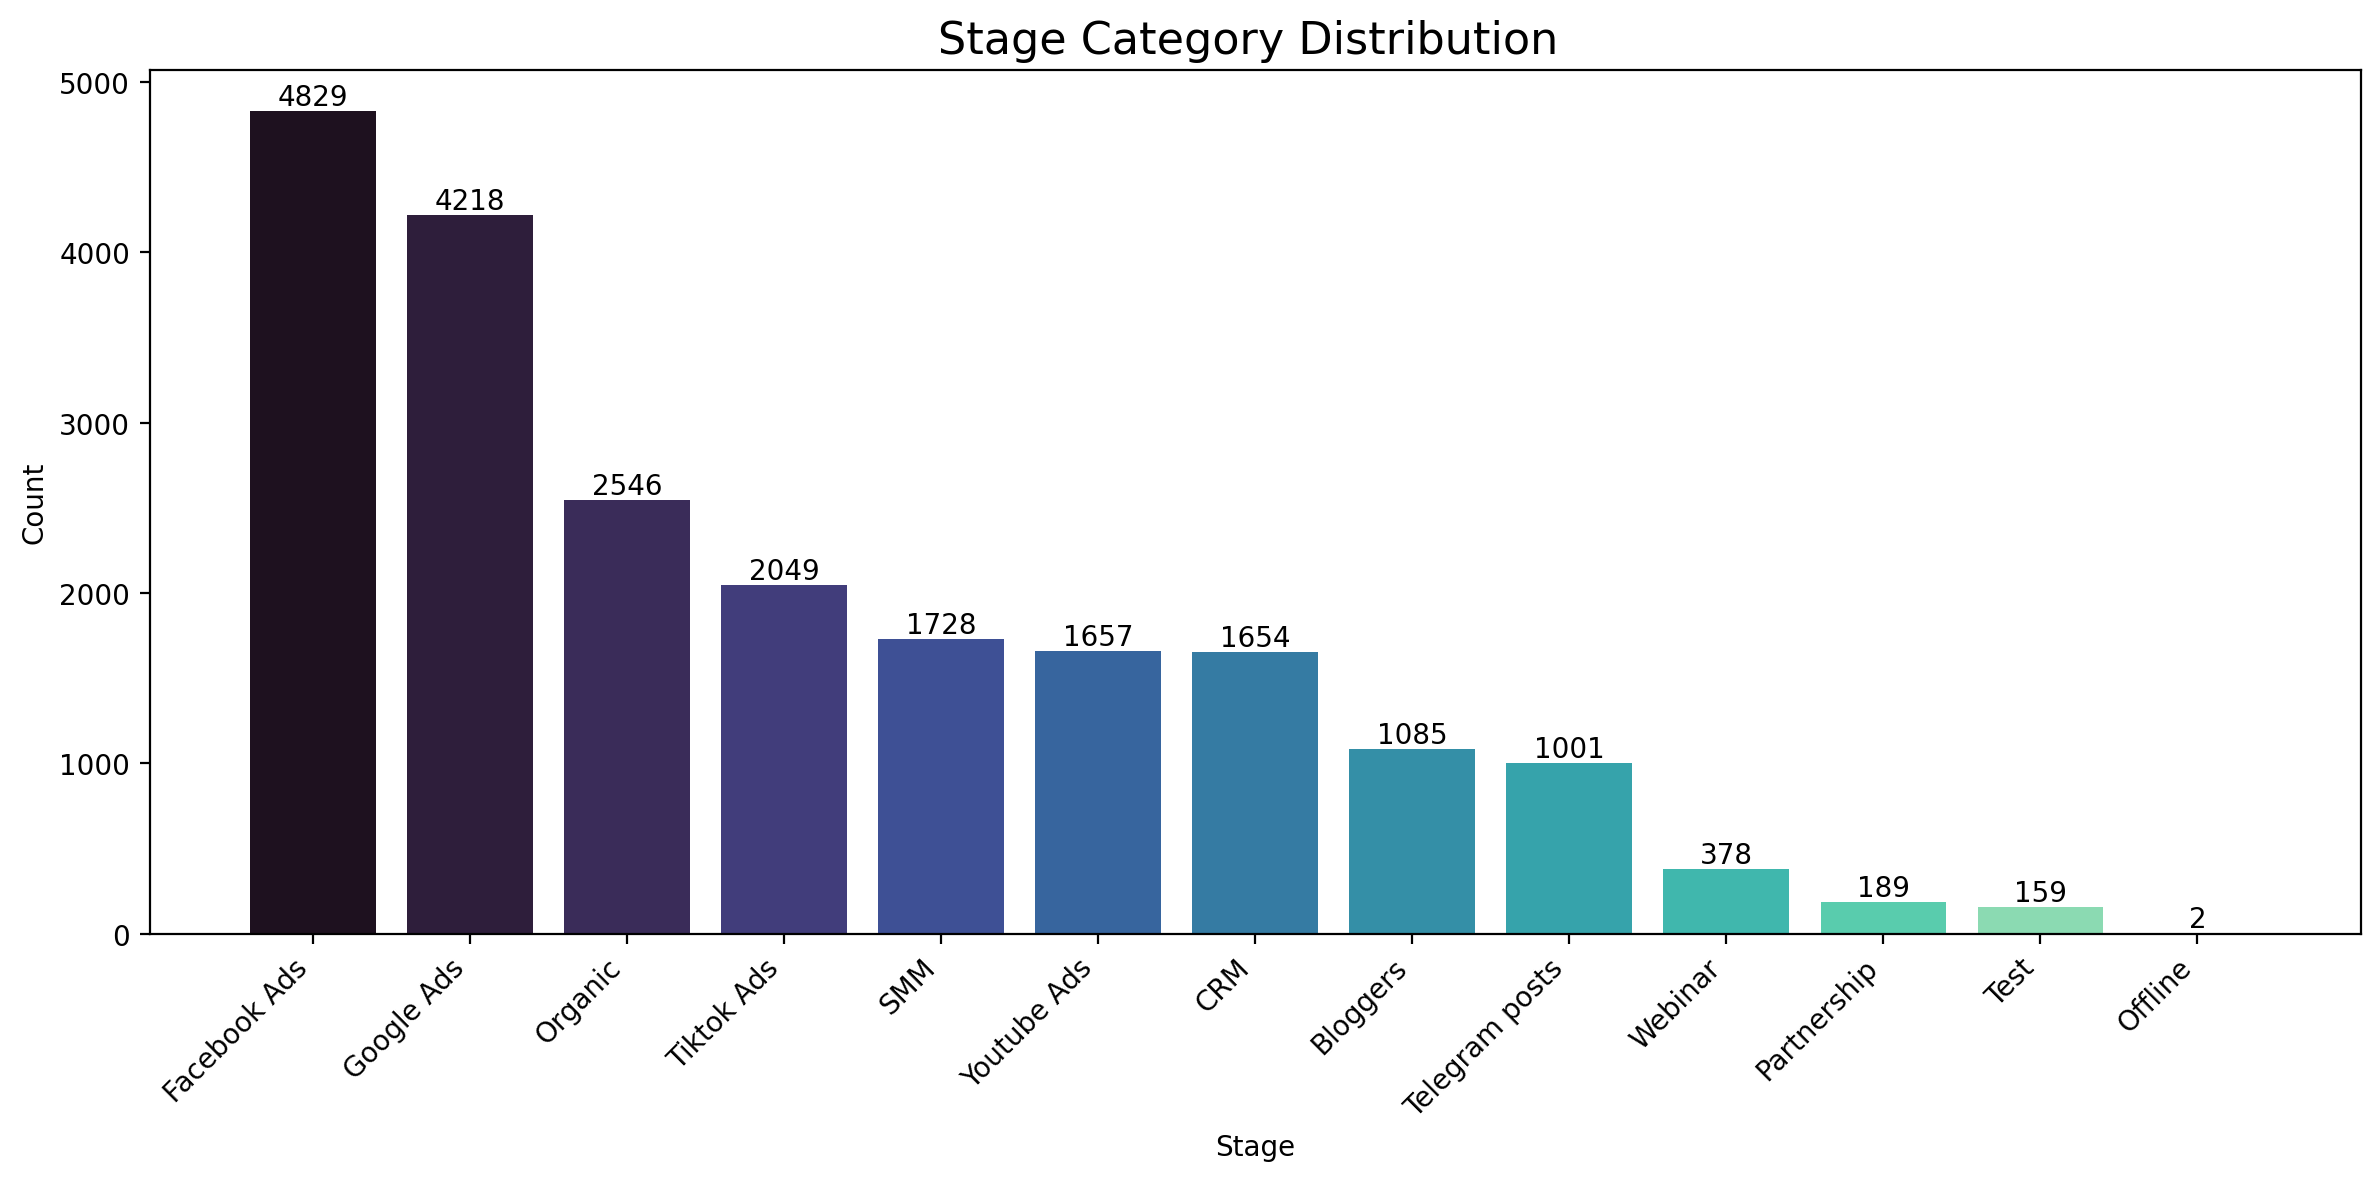

In [ ]:

fig, ax = plt.subplots(figsize=(12, 6))
color_palette = sns.color_palette('mako', len(value_counts))

# Генерация столбчатой диаграммы
bars = ax.bar(value_counts.index, value_counts.values, color=color_palette[:len(value_counts)])

# Добавление значений над каждым столбцом
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='bottom')

# Настройка осей и меток
plt.xticks(rotation=45, ha='right')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.title('Stage Category Distribution ', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Payment Done 848
stage_counts = deals[deals['Stage'] == 'Payment Done']['Stage'].value_counts()
print(stage_counts)

Stage
Payment Done                 848
Call Delayed                   0
Free Education                 0
Lost                           0
Need To Call                   0
Need a consultation            0
Need to Call - Sales           0
New Lead                       0
Qualificated                   0
Registered on Offline Day      0
Registered on Webinar          0
Test Sent                      0
Waiting For Payment            0
Name: count, dtype: int64


In [ ]:
 deals[deals['Stage'] == 'Payment Done']


,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,Content,Term,...,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,SLA_Seconds,SLA_Seconds_TD
468,5805028000055502703,Eva Kent,2024-06-18,B - Medium,Payment Done,Unknown,/pl-eng/web-developer,performancemax_wide_AT,_{region_name}_,Unknown,...,2024-06-15 20:01:00,11,1,500.0,4500.0,5805028000055471387,Podskalie,No Level,52520,0 days 14:35:20
478,5805028000055524315,Ben Hall,2024-06-19,A - High,Payment Done,Unknown,/eng,12.07.2023wide_DE,bloggersvideo11,wide,...,2024-06-15 17:02:00,11,1,500.0,4500.0,5805028000055503302,Zinnowitz,No Level,1045,0 days 00:17:25
497,5805028000055524040,Ben Hall,NaT,B - Medium,Payment Done,Unknown,/eng,Live_DE,b0,03_06_2024,...,2024-06-15 12:20:00,6,1,1000.0,9000.0,5805028000055464156,Wolfsburg,B1,1422,0 days 00:23:42
833,5805028000054664018,Ben Hall,NaT,D - Non Target,Payment Done,Unknown,/eng,Unknown,Unknown,Unknown,...,2024-06-11 19:39:00,6,1,1000.0,9000.0,5805028000054683001,Zwickau,A2,59512,0 days 16:31:52
1040,5805028000054257317,Quincy Vincent,2024-06-17,B - Medium,Payment Done,Unknown,/eng,02.07.23wide_DE,bloggersvideo16com,wide,...,2024-06-10 15:33:00,11,1,1000.0,11000.0,5805028000054284461,Leinfelden-Echterdingen,B1,2755,0 days 00:45:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21314,5805028000002302112,Julia Nelson,2023-07-19,C - Low,Payment Done,Expensive,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,_{region_name}_,Unknown,...,2023-07-18 21:11:00,6,2,1000.0,5000.0,5805028000002302109,Wolfsburg,B1,55492,0 days 15:24:52
21367,5805028000001987082,Julia Nelson,2023-07-17,C - Low,Payment Done,Conditions are not suitable,eng/digital-marketing,12.07.2023wide_DE,v3com,wide,...,2023-07-17 18:02:00,11,11,1000.0,11000.0,5805028000001986077,-,B1,2956,0 days 00:49:16
21410,5805028000001885076,Jane Smith,2023-08-31,A - High,Payment Done,Unknown,eng/digital-marketing,04.07.23recentlymoved_DE,b2,recentlymoved,...,2023-07-15 13:27:00,11,11,450.0,4000.0,5805028000001880249,Ingolstadt,No Level,811,0 days 00:13:31
21555,5805028000001401001,Oliver Taylor,NaT,B - Medium,Payment Done,Unknown,eng/digital-marketing,02.07.23wide_DE,b3,wide,...,2023-07-08 08:56:00,11,8,1000.0,11500.0,5805028000001350049,Unknown,No Level,8556,0 days 02:22:36


**В данном случае, этот код был исключен из анализа, так как считаю это подтосовкой данных.В реальных условиях ,это одна из версий обработки, где вижу необходимость согласовать такой шаг с заказчиком.**
- Было обнаружена не соответствие сумм в отдельных строках со статусом Payment Done в столбцах Initial Amount Paid сумма была больше чем в  Offer Total Amount- что не логично, так как Initial Amount Paid-это первоначальный платеж.
- Что бы не допустить искажения данных заменяем местами все значения где сумма  Initial Amount Paid привышает Offer Total Amount

In [ ]:
# Фильтруем сделки со статусом 'Payment Done'
#payment_done_deals = deals[deals['Stage'] == 'Payment Done'].copy()

# Создаем маску, где Initial Amount Paid больше Offer Total Amount
#mask = payment_done_deals['Initial Amount Paid'] > payment_done_deals['Offer Total Amount']

# Применяем обмен значений только к строкам, где условие истинно
#payment_done_deals.loc[mask, ['Initial Amount Paid', 'Offer Total Amount']] = \
    #payment_done_deals.loc[mask, ['Offer Total Amount', 'Initial Amount Paid']].values

# Обновляем исходный DataFrame
#deals.update(payment_done_deals)

# Выводим результат для проверки
#print(deals[deals['Stage'] == 'Payment Done'][['Stage', 'Initial Amount Paid', 'Offer Total Amount']])

# Опционально: подсчет количества измененных строк
#num_swapped = mask.sum()
#print(f"Количество строк, где были поменяны значения: {num_swapped}")

              Stage  Initial Amount Paid  Offer Total Amount
468    Payment Done                  500                4500
478    Payment Done                  500                4500
497    Payment Done                 1000                9000
833    Payment Done                 1000                9000
1040   Payment Done                 1000               11000
...             ...                  ...                 ...
21314  Payment Done                 1000                5000
21367  Payment Done                 1000               11000
21410  Payment Done                  450                4000
21555  Payment Done                 1000               11500
21586  Payment Done                 1000               11000

[848 rows x 3 columns]
Количество строк, где были поменяны значения: 21


Есть клиенты которые оплатили 2 сделки(возможно платят за себя и за кого-то еще или же учаться одновременно на 2х курсах)

In [ ]:
# Подсчет количества оплаченных сделок для каждого контакта
paid_deals_count = deals[deals['Stage'] == 'Payment Done']['Contact Name'].value_counts()

# Фильтрация клиентов, совершивших 2 или более оплаченных сделок
repeat_customers = paid_deals_count[paid_deals_count >= 2]

print("Клиенты, совершившие  более 1 оплаченных сделок:")
print(repeat_customers)


Клиенты, совершившие  более 1 оплаченных сделок:
Contact Name
5805028000017756471    2
5805028000033276868    2
5805028000043599528    2
5805028000009072093    2
Name: count, dtype: int64


Одна сделка произошла в ноябре 2023-был пройден вечерний курс и вторая 2024-02-06 еще в процессе -дневной курс

In [ ]:
deals[deals['Contact Name'].astype(str) == '5805028000017756471']


,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,Content,Term,...,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,SLA_Seconds,SLA_Seconds_TD
10686,5805028000030302188,Julia Nelson,NaT,C - Low,Payment Done,Unknown,/eng,02.07.23wide_DE,bloggersvideo6blackfriday,wide,...,2024-02-06 11:54:00,11,5,1000.0,11000.0,5805028000017756471,Oberhausen,A2,626677,7 days 06:04:37
15674,5805028000018253028,Julia Nelson,NaT,Unknown,Registered on Webinar,Unknown,/workshop,14.11.23wide_webinar_DE,bloggersvideo8webinar,wide,...,2023-11-22 00:11:00,11,5,NaN,NaN,5805028000017756471,Oberhausen,A2,0,0 days 00:00:00
16034,5805028000017724596,Julia Nelson,2023-11-29,C - Low,Payment Done,Unknown,/eng,02.07.23wide_DE,bloggersvideo6blackfriday,wide,...,2023-11-19 15:55:00,11,4,350.0,3500.0,5805028000017756471,Oberhausen,A2,2156,0 days 00:35:56


 Клиент оплатил 2 шестимесячных курса из которых один уже закончился  и 2й курс еще продолжаеться

In [ ]:
deals[deals['Contact Name'].astype(str) == '5805028000033276868']

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,Content,Term,...,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,SLA_Seconds,SLA_Seconds_TD
8650,5805028000035895001,Charlie Davis,2024-03-11,C - Low,Payment Done,Unknown,/eng,Unknown,Unknown,Unknown,...,2024-03-06 12:28:00,6,4,600.0,2000.0,5805028000033276868,Leipzig,B1,162400,1 days 21:06:40
9584,5805028000033428022,Charlie Davis,NaT,C - Low,Payment Done,Unknown,/eng,Unknown,Unknown,Unknown,...,2024-02-22 11:58:00,6,2,1000.0,5000.0,5805028000033276868,Leipzig,B1,6230,0 days 01:43:50


С одного счета было приобретено 2 одинаковых курса ,но на разные типы обучения-один вечерний другой утренний и в разное время

In [ ]:
deals[deals['Contact Name'].astype(str) == '5805028000009072093']


,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,Content,Term,...,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,SLA_Seconds,SLA_Seconds_TD
6357,5805028000042015392,Ulysses Adams,2023-10-03,A - High,Payment Done,Unknown,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,_{region_name}_,Unknown,...,2024-04-05 10:40:00,11,1,1000.0,11000.0,5805028000009072093,Düren,C1,547258,6 days 08:00:58
18993,5805028000009053118,Ulysses Adams,2023-10-03,A - High,Payment Done,Unknown,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,_{region_name}_,Unknown,...,2023-09-26 17:02:00,11,4,400.0,4000.0,5805028000009072093,Düren,C1,5479,0 days 01:31:19


Судя по датам закрытия сделки- с одного счета было приобретено сразу 2 курса с разницей в 4 дня

In [ ]:
deals[deals['Contact Name'].astype(str) == '5805028000043599528']

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,Content,Term,...,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,SLA_Seconds,SLA_Seconds_TD
4152,5805028000045990526,Charlie Davis,2024-04-24,C - Low,Payment Done,Unknown,/at-eng,Unknown,Unknown,Unknown,...,2024-04-24 08:12:00,11,3,1000.0,2900.0,5805028000043599528,Wien,No Level,0,0 days 00:00:00
4667,5805028000044884003,Charlie Davis,2024-04-20,C - Low,Payment Done,Unknown,/at-eng,webinar1604,Unknown,Unknown,...,2024-04-18 09:17:00,11,3,1000.0,4000.0,5805028000043599528,Wien,No Level,0,0 days 00:00:00
5133,5805028000043907724,Charlie Davis,NaT,Unknown,Registered on Webinar,Unknown,/webinar,webinar1604,Unknown,invitation,...,2024-04-15 20:39:00,11,5,NaN,NaN,5805028000043599528,Wien,No Level,0,0 days 00:00:00
5491,5805028000043593528,Charlie Davis,2024-04-24,C - Low,Lost,Changed Decision,/at-eng,discovery_wide1_AT,163114990034_{region_name}_694172430606,Unknown,...,2024-04-13 06:29:00,11,5,NaN,NaN,5805028000043599528,Wien,No Level,115576,1 days 08:06:16


In [ ]:
# смогла отыскать свою запись в данных
deals[(deals['City'] == 'Hannover') & (deals['Stage'] == 'Payment Done') & (deals['Level of Deutsch'] == 'B1') ]

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,Content,Term,...,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,SLA_Seconds,SLA_Seconds_TD
14653,5805028000020481711,Oliver Taylor,NaT,A - High,Payment Done,Unknown,/eng/ux-ui,Dis_DE,151836595805_{region_name}_673801336999,Unknown,...,2023-12-10 09:28:00,11,7,1000.0,11000.0,5805028000020444829,Hannover,B1,11574,0 days 03:12:54


In [ ]:
cat_cols=deals.select_dtypes(include=['category']).columns.tolist()
num_cols = deals.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Quality', 'Stage', 'Lost Reason', 'Page', 'Campaign', 'Content', 'Term', 'Source', 'Payment Type', 'Product', 'Education Type', 'City']
Numerical Variables:
['Course duration', 'Months of study', 'SLA_Seconds', 'SLA_Seconds_TD']


## Двумерный анализ

Двумерный анализ помогает понять, как независимые переменные связаны друг с другом, а также как независимые переменные влияют на зависимые. Для числовых столбцов  двумерный анализ выполняется с помощью парных графиков и диаграмм рассеяния. Для категориальных переменных используются столбчатые диаграммы разных типов.

Для начала построим парный график для всех числовых столбцов нашего набора данных.


<Figure size 1200x1000 with 0 Axes>

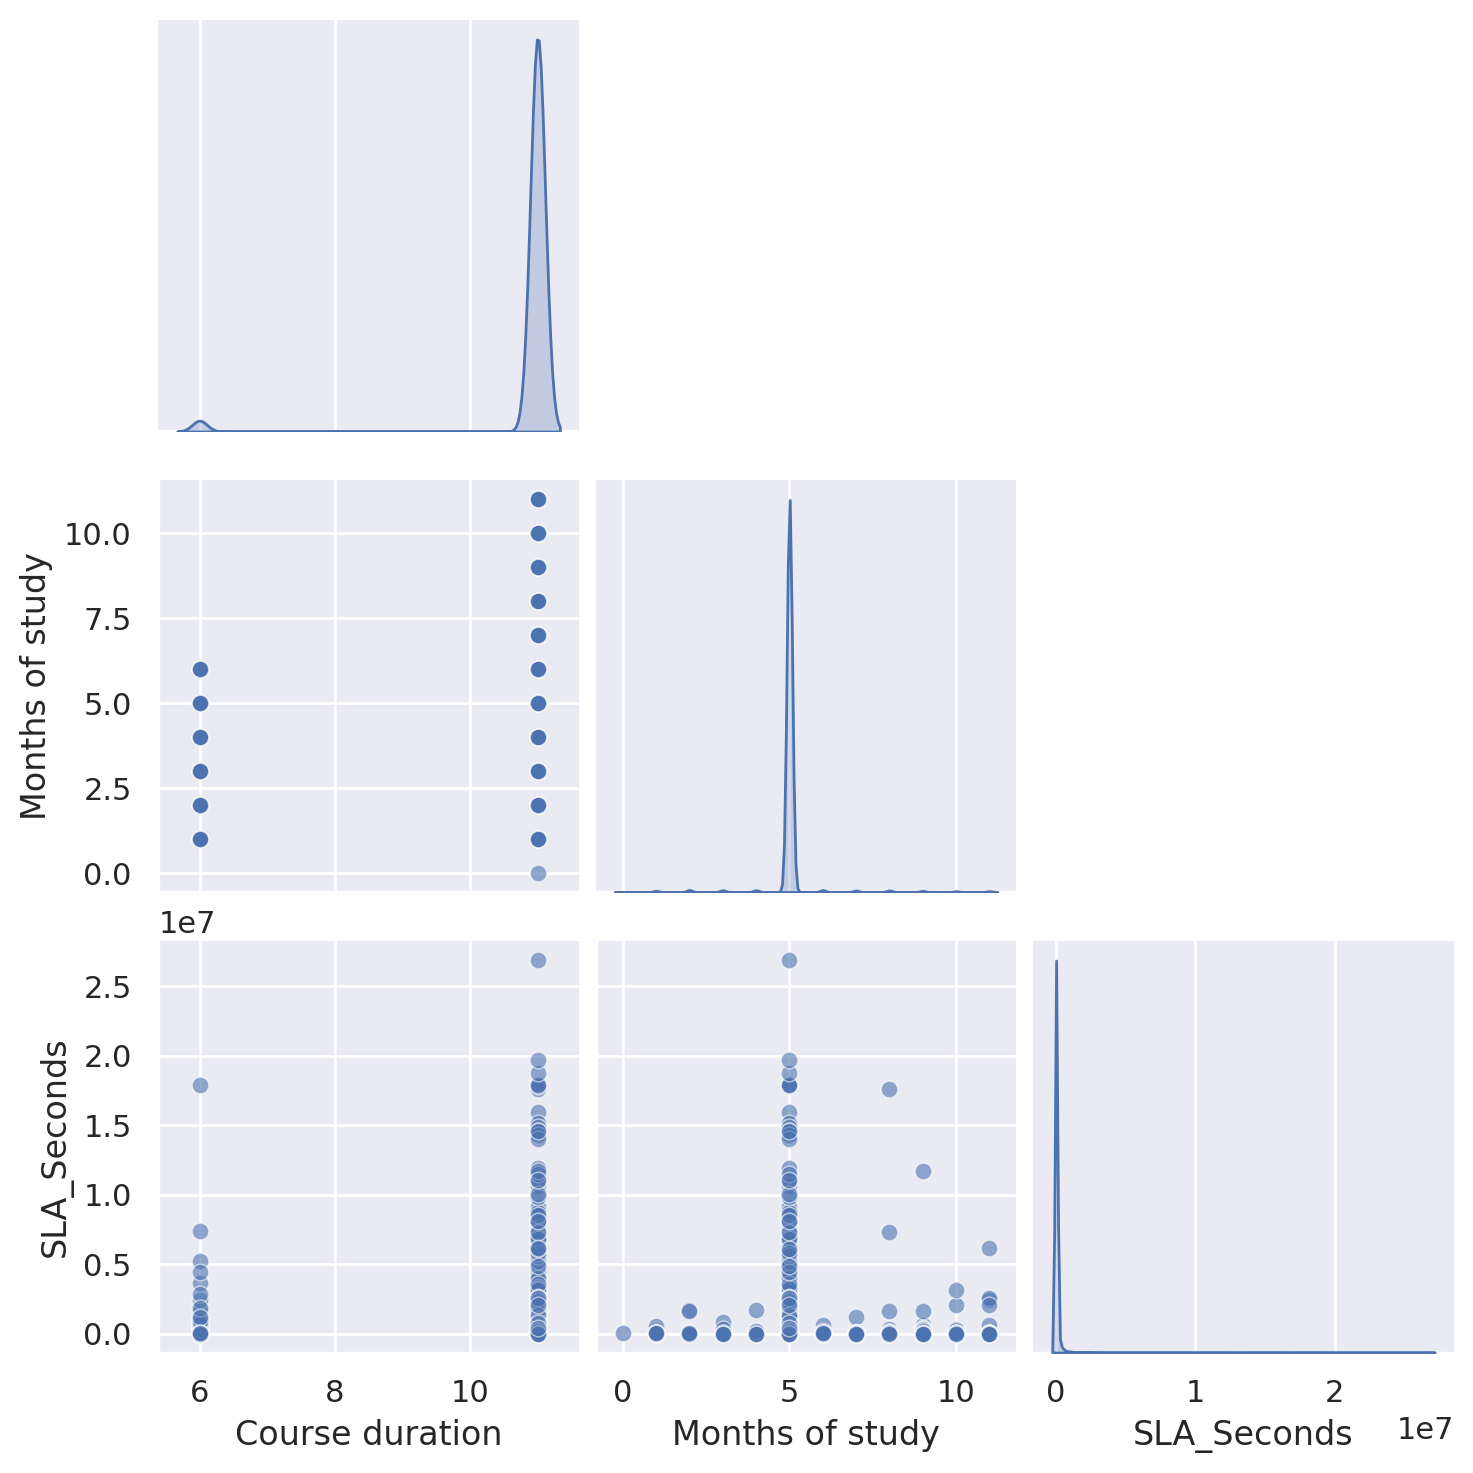

In [ ]:
# Позволит избежать зависаний при дальнейшей визуализации данных
%config InlineBackend.figure_format = 'png2x'
sns.set(font_scale=1.0)
plt.figure(figsize=(12, 10))

# Создание pairplot с параметрами и заданным размером фигуры
pairplot = sns.pairplot(deals, corner=True, diag_kind="kde", plot_kws={'alpha':0.6})

Теперь построим столбчатые диаграммы для анализа влияния категориальных переменных на текущую ситуацию бизнеса.

- **Closing Date** - поскольку пропущенные знанения могут быть значимыми, так как пропущенные значения в этом контексте могут означать, что сделка еще не закрыта или что дата закрытия не была зарегистрирована. Мы их оставим, проеобразовав этот столбец в формат datetime, используя errors ='coerce', чтобы пропуски оставались как 'NaT', что позволит сохранить эту информацию.


In [ ]:
deals.info()
deals.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 21495 entries, 0 to 21592
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Id                   21495 non-null  object         
 1   Deal Owner Name      21495 non-null  object         
 2   Closing Date         14595 non-null  datetime64[ns] 
 3   Quality              21495 non-null  category       
 4   Stage                21495 non-null  category       
 5   Lost Reason          21495 non-null  category       
 6   Page                 21495 non-null  category       
 7   Campaign             21495 non-null  category       
 8   Content              21495 non-null  category       
 9   Term                 21495 non-null  category       
 10  Source               21495 non-null  category       
 11  Payment Type         21495 non-null  category       
 12  Product              21495 non-null  category       
 13  Education Type       

,0
Id,0
Deal Owner Name,0
Closing Date,6900
Quality,0
Stage,0
Lost Reason,0
Page,0
Campaign,0
Content,0
Term,0


In [ ]:
# Объединяем все DataFrame в один словарь
dataframes = {
    'deals': deals,
    'calls': calls,
    'contacts': contacts,
    'spend': spend
}
import pickle
with open('clean_data.pkl', 'wb') as f:
    pickle.dump(dataframes, f) # Сохраняем все DataFrame в файл all_data.pkl
print("Все данные успешно сохранены в один файл pkl!")

Все данные успешно сохранены в один файл pkl!
